> # # **PROYECTO: RECOMENDACIÓN DE PRODUCTOS BANCARIOS A CLIENTES**

![](http://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Santander_Argentina_Logo.png/1200px-Santander_Argentina_Logo.png)


> # **Sección 3: ANÁLISIS EXPLORATORIO DE DATOS (EDA)**
![](https://cdn-icons-png.flaticon.com/128/6020/6020458.png)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Tratamiento de datos
import numpy as np                    
import pandas as pd
!pip install prettytable
from prettytable import PrettyTable
import warnings
# Gráficos
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt # El modulo Pyplot de Matplotlib
!pip install seaborn
import seaborn as sns                 # Importar Seaborn
#from sklearn.preprocessing import scale
!pip install scikit-learn
from sklearn import preprocessing  # Import label encoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split #para separar en train y test
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
# Modelos de Clasificacion:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# MULTINOMIAL NAVES BAYES
from sklearn.naive_bayes import MultinomialNB
# LIGHT GBM
!pip install lightgbm
import lightgbm as lgb
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# XGBOOST
!pip install xgboost
import xgboost 
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import plot_importance
# Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('¡Librerías importadas con éxito!')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
¡Librerías importadas con éxito!


In [ ]:
#Lectura de dataset (archivo csv)
clientes = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip', header=0)
# Muestra de las diez primeras filas del dataset
clientes.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


**3.6 ANÁLISIS BIVARIADO**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPovJ0w-SEvAYJbKHcErzADJGgYyrWW7uGQw&usqp=CAU)

En esta oportunidad, se realizaran algunas visualizaciones bivariadas. El objetivo será entonces, encontrar relaciones de diverso tipo y que permitan de laguna manera comprender mejor el dataset y la causalidad entre las variables que lo componen.Para el análisis bivariado se procederá a realizar:

* Tabla de correlacion 
* Gráfico de correlacion 
* Análisis numérico vs numérico
* Análisis categórico vs categórico
* Análisis numérico vs temporal

> **TABLA DE CORRELACIÓN**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRW6gzmYYoJcFu7i5QOjxVkupnKdJNZxWqnr4OWr_1mpRBre2-drP2KeK9XTpxj9aNLWQc&usqp=CAU)

In [ ]:
clientes["age"] = pd.to_numeric(clientes["age"],errors = 'coerce')
mean_age = float(clientes['age'].mean())
mean_age = round(mean_age)
clientes['age'].fillna(value = mean_age, inplace = True)
clientes.antiguedad[(clientes.antiguedad == '     NA') | (clientes.antiguedad == '-999999')] = np.median(np.array(clientes.antiguedad[clientes.antiguedad != '     NA'], dtype=int))
clientes.antiguedad = clientes.antiguedad.astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#Se calculan a continuación los coeficientes de correlación para los pares de variables de tipo numérico en el dataset
clientes.corr()

,ncodpers,ind_nuevo,antiguedad,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
ncodpers,1.000000,0.347430,-0.044041,0.028580,NaN,-0.040821,-0.140516,-0.073254,-0.013037,-0.005278,...,-0.096869,-0.119479,-0.035985,-0.189476,-0.188148,-0.173800,-0.074148,-0.119276,-0.131112,-0.143262
ind_nuevo,0.347430,1.000000,-0.013627,0.063021,NaN,-0.004372,-0.004244,-0.008655,-0.002548,-0.001019,...,-0.019311,-0.023275,-0.012582,-0.055008,-0.051815,-0.038225,-0.015613,-0.036876,-0.039373,-0.053103
antiguedad,-0.044041,-0.013627,1.000000,-0.001267,NaN,0.001851,0.006129,0.003214,0.000668,0.000275,...,-0.002594,-0.002066,0.001736,0.006724,0.006921,0.005341,0.003937,0.002700,0.003391,0.005266
indrel,0.028580,0.063021,-0.001267,1.000000,NaN,-0.000410,-0.033029,0.000012,-0.000432,-0.000206,...,-0.003150,-0.004021,-0.001879,-0.006023,-0.008518,-0.006373,-0.002656,-0.009256,-0.009652,-0.011989
tipodom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_prov,-0.040821,-0.004372,0.001851,-0.000410,NaN,1.000000,0.028168,-0.013331,0.001366,0.000525,...,-0.003413,0.003345,-0.008385,0.007107,0.008992,0.013285,0.004053,0.010348,0.011308,0.014927
ind_actividad_cliente,-0.140516,-0.004244,0.006129,-0.033029,NaN,0.028168,1.000000,0.024394,0.005574,0.005242,...,0.083339,0.103684,0.036457,0.222989,0.232320,0.173320,0.039814,0.260518,0.272069,0.412218
renta,-0.073254,-0.008655,0.003214,0.000012,NaN,-0.013331,0.024394,1.000000,0.002322,0.001613,...,0.003682,0.019423,-0.004516,0.034394,0.025588,0.027416,0.009635,0.011918,0.014016,0.017512
ind_ahor_fin_ult1,-0.013037,-0.002548,0.000668,-0.000432,NaN,0.001366,0.005574,0.002322,1.000000,-0.000049,...,0.002442,0.005639,-0.000519,0.007620,0.001444,0.006250,0.014351,0.000242,0.000093,0.003220
ind_aval_fin_ult1,-0.005278,-0.001019,0.000275,-0.000206,NaN,0.000525,0.005242,0.001613,-0.000049,1.000000,...,-0.000370,0.002253,-0.000247,0.011016,0.010423,0.013198,-0.000299,0.011704,0.011163,0.011151


**MATRIZ DE CORRELACIÓN**

La correlación establece cómo se relacionan las características entre sí o con la variable de destino.
La correlación puede ser positiva (el aumento de un valor de la función aumenta el valor de la variable objetivo) o negativa (el aumento de un valor de la función disminuye el valor de la variable objetivo)
El mapa de calor facilita la identificación de las características que están más relacionadas con la variable de destino. Trazaremos un mapa de calor de las características correlacionadas utilizando la biblioteca Seaborn.

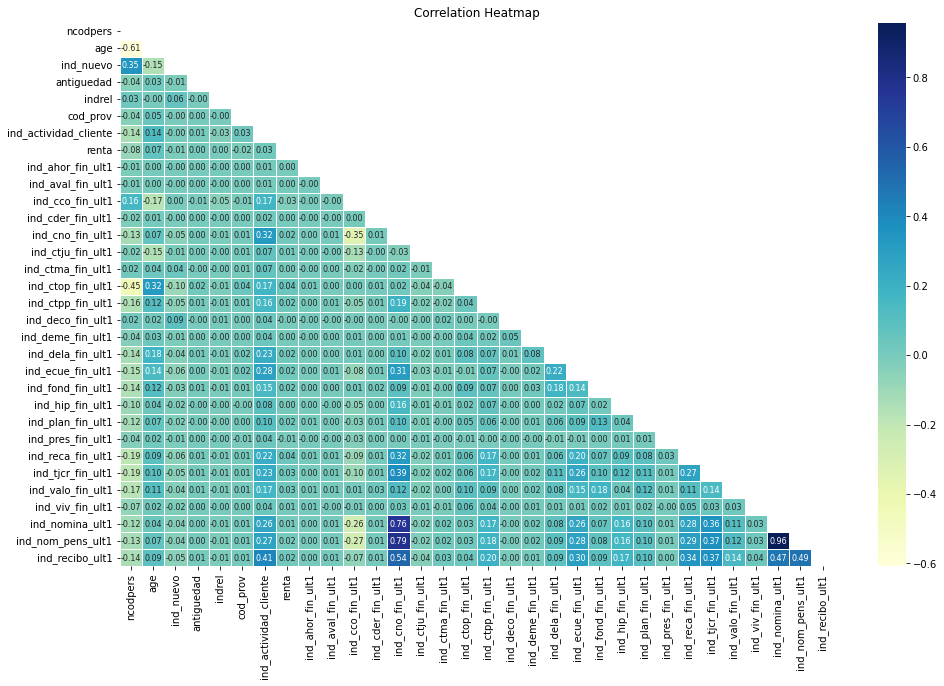

In [ ]:
#plt.figure(dpi = 90,figsize= (10,10))
clientes_ = clientes.drop(['tipodom'],axis=1)

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(clientes_.corr(),dtype = bool))
sns.heatmap(clientes_.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'YlGnBu', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

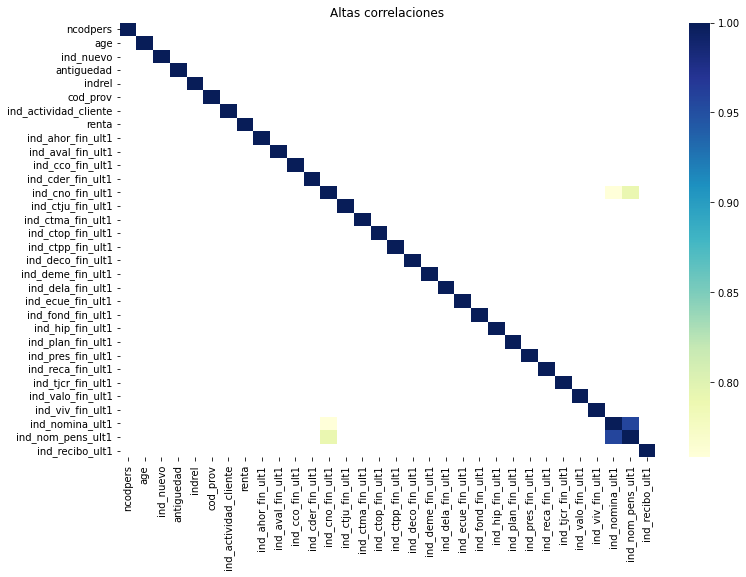

In [ ]:
clientes_ = clientes.drop(['tipodom'],axis=1)
matrix_correlation= clientes_.corr()
#filtro de la matriz
high_corr=matrix_correlation[matrix_correlation>=.7]
plt.figure (figsize=(12,8))
mask = np.triu(np.ones_like(clientes_.corr(),dtype = bool))
sns.heatmap(high_corr,cmap='YlGnBu')
plt.title('Altas correlaciones');

In [ ]:
def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

corrFilter(clientes, .7)

,Variable_1,Variable_2,corr_value
4,ind_nomina_ult1,ind_nom_pens_ult1,0.957215
3,ind_cno_fin_ult1,ind_nom_pens_ult1,0.790128
2,ind_cno_fin_ult1,ind_nomina_ult1,0.757957
1,ncodpers,antiguedad,-0.967521


# Observación:
Los pares de variables que tienen las correlaciones positivas más significativas son:
* ind_nomina_ult1 - ind_cno_fin_ult1
* ind_nom_pens-ult1 - ind_cno_fin_ult1
* ind_nom_pens_ult1 - ind_nomina_ult1
* ind_nomina_ult1 - ind_n_pens_ult1

/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


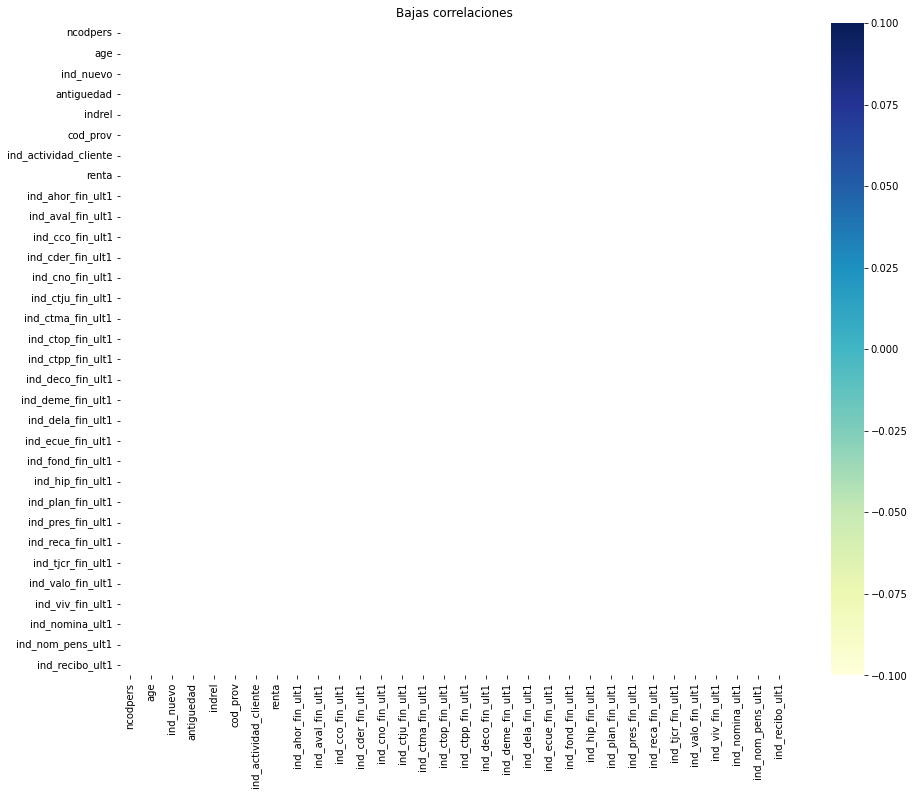

In [ ]:
#filtro de la matrix
low_corr=matrix_correlation[matrix_correlation<=-0.7]
plt.figure (figsize=(15,12))
sns.heatmap(low_corr,cmap='YlGnBu')
plt.title ('Bajas correlaciones');

# Observación: 
Se destaca que no existe correlaciones negativas significativas en estos gráficos.

> **ANÁLISIS NUMÉRICO VS CATEGÓRICO**
![](https://enciclopediaeconomica.com/wp-content/uploads/2019/01/icono-variable-cuantitativa.jpg)
![](https://enciclopediaeconomica.com/wp-content/uploads/2019/01/variables-cualitativas.jpg)

# ¿Existe alguna relación entre la edad de los clientes y su género?

<AxesSubplot:xlabel='age', ylabel='count'>

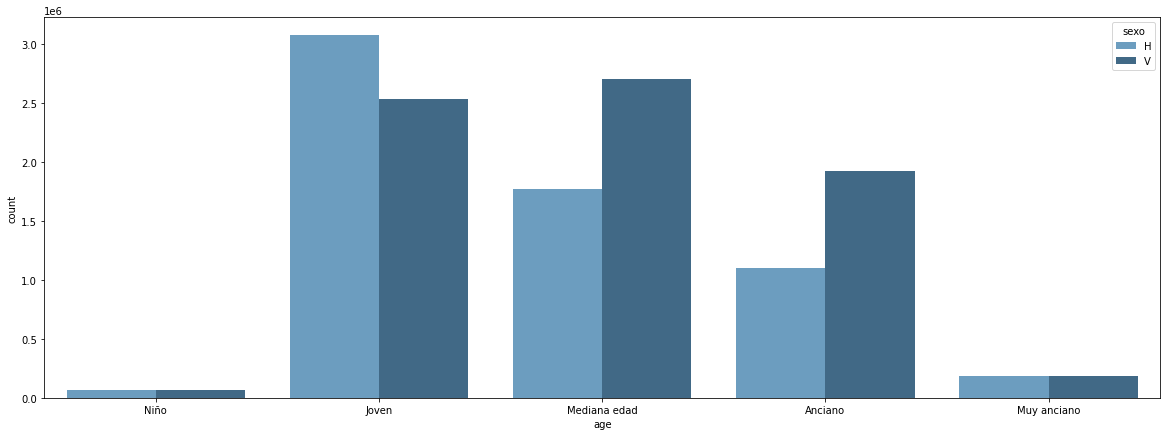

In [ ]:
#datos para el gráfico
bins = [0,18,33,50,80,200]
label =['Niño','Joven','Mediana edad','Anciano','Muy anciano']
clientes['age'] = pd.cut(clientes['age'], bins,labels = label)
#Countplot de edad con género
fig = plt.figure(figsize =(20,7))
sns.countplot(x="age",data=clientes,hue='sexo', palette='Blues_d')

# Interpretación:
Hay más mujeres usuarias que hombres en el grupo de edad de 18 a 33 años. El número de usuarios masculinos predomina en los demás grupos de edad.

# ¿Existe alguna relación entre la antiguedad de los clientes y su género?

Media                  3702786
Baja                   3697594
Muy alta               2738344
Alta                   2250640
Extremadamente alta    1257945
Name: antiguedad, dtype: int64


<AxesSubplot:xlabel='antiguedad', ylabel='count'>

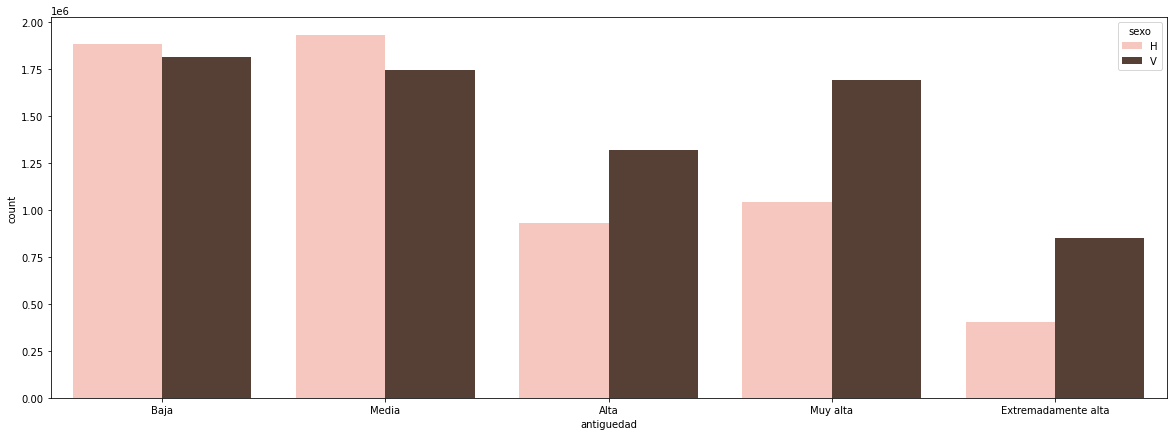

In [ ]:
#Lets bin Seniority of Months
bin = [-1000000,24,60,120,180,30000]
label = ['Baja','Media','Alta','Muy alta','Extremadamente alta']
clientes['antiguedad'] = pd.cut(clientes['antiguedad'],bin,labels=label)
print(clientes.antiguedad.value_counts())
fig = plt.figure(figsize =(20,7))
sns.countplot(x="antiguedad",data=clientes,hue='sexo',palette= sns.color_palette(['#FFC1B6','#5C3D2E','#2D2424','#FDFFBC','#B85C38']))

# Interpretación

Las clientas mujeres predominan para antiguedades bajas y medias.

# ¿Existe alguna relación entre el ingreso medio de los clientes y el segmento al que pertenecen?

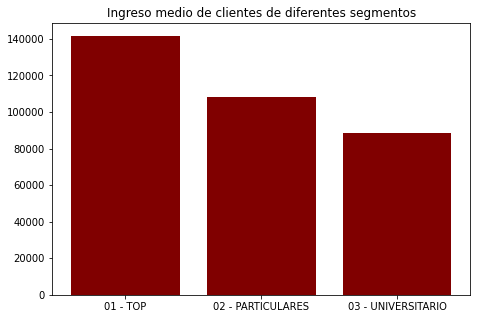

In [ ]:
#Plotting ingreso medio de clientes de diferentes segmentos
segmento_media = clientes[['renta', 'segmento']].groupby('segmento').median()
plt.figure(figsize=(7.5,5))
plt.title('Ingreso medio de clientes de diferentes segmentos')
plt.bar(range(len(segmento_media)), segmento_media.renta, color='maroon')
plt.xticks(np.arange(len(segmento_media)),list(segmento_media.index))
plt.show()

# Interpretación:

Los clientes del segmento Top tienen el ingreso promedio más alto y el segmento Universitario el menor poder adquisitivo.

# ¿Existe alguna relación entre el segmento al que pertenecen los clientes y su edad?

<AxesSubplot:xlabel='segmento', ylabel='age'>

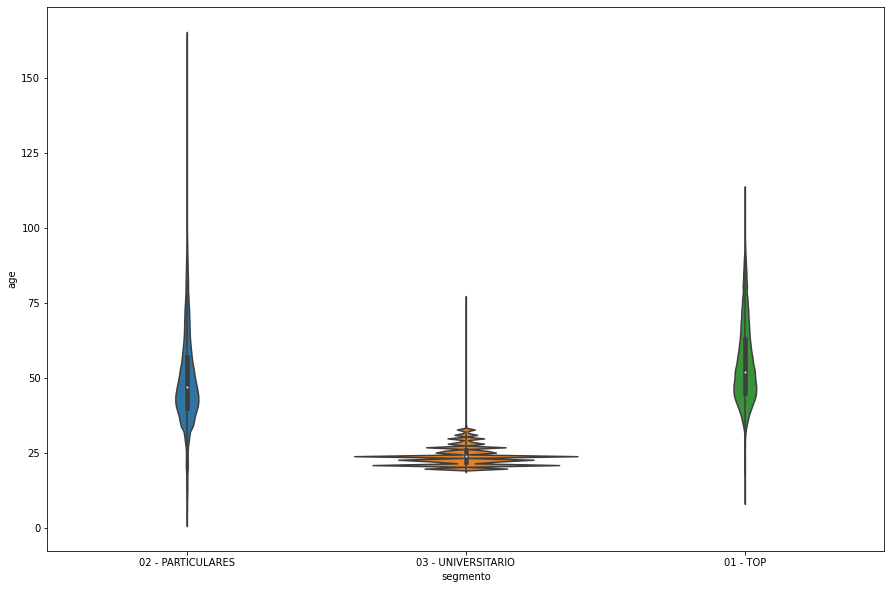

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x = 'segmento', y= 'age', data=clientes )

# Interpretación:

Si bien el número de clientes hombres es superior al de mujeres, la diferencia no es significativa. No existe una fuerte preferencia en los productos entre hombres y mujeres. La mayor proporción de clientes pertenece al segmento particulares (59,15%), conformandose mayormente por usuarios de mediana edad.

# ¿Existe alguna relación entre la edad de los clientes y su lugar de residencia?

<Figure size 1368x288 with 0 Axes>

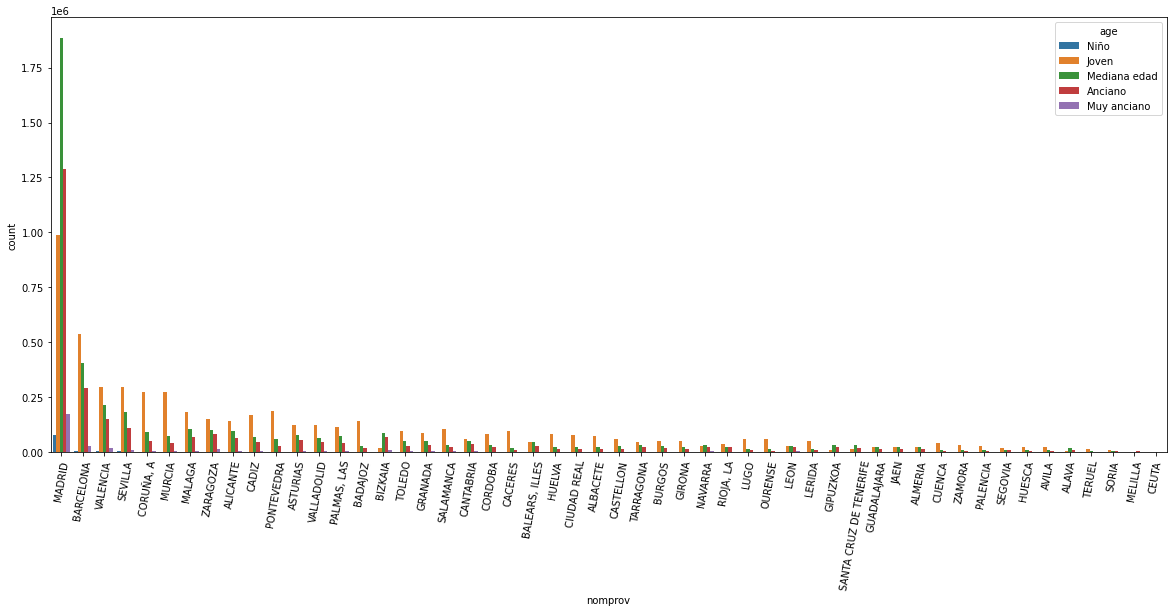

In [ ]:
#datos para el gráfico
clientes["age"] = pd.to_numeric(clientes["age"],errors = 'coerce')
mean_age = float(clientes['age'].mean())
mean_age = round(mean_age)
clientes['age'].fillna(value = mean_age, inplace = True)
bins = [0,18,33,50,80,200]
label =['Niño','Joven','Mediana edad','Anciano','Muy anciano']
clientes['age'] = pd.cut(clientes['age'], bins,labels = label)
f = plt.figure()
f.set_figwidth(19)
f.set_figheight(4)
fig = plt.figure(figsize =(20,8))
sns.countplot(x="nomprov",data=clientes,hue='age', order=clientes['nomprov'].value_counts().index)
plt.xticks(rotation=80)
plt.title ='Ciudades con distribución de edad'
plt.show()

# Interpretación:

En Madrid predominan los clientes de mediana edad.

> **ANÁLISIS CATEGÓRICO VS CATEGÓRICO**
![](https://enciclopediaeconomica.com/wp-content/uploads/2019/01/variables-cualitativas.jpg)
![](https://enciclopediaeconomica.com/wp-content/uploads/2019/01/variables-cualitativas.jpg)

# ¿Existe alguna relación entre el género de los clientes y su lugar de residencia?

<Figure size 1368x288 with 0 Axes>

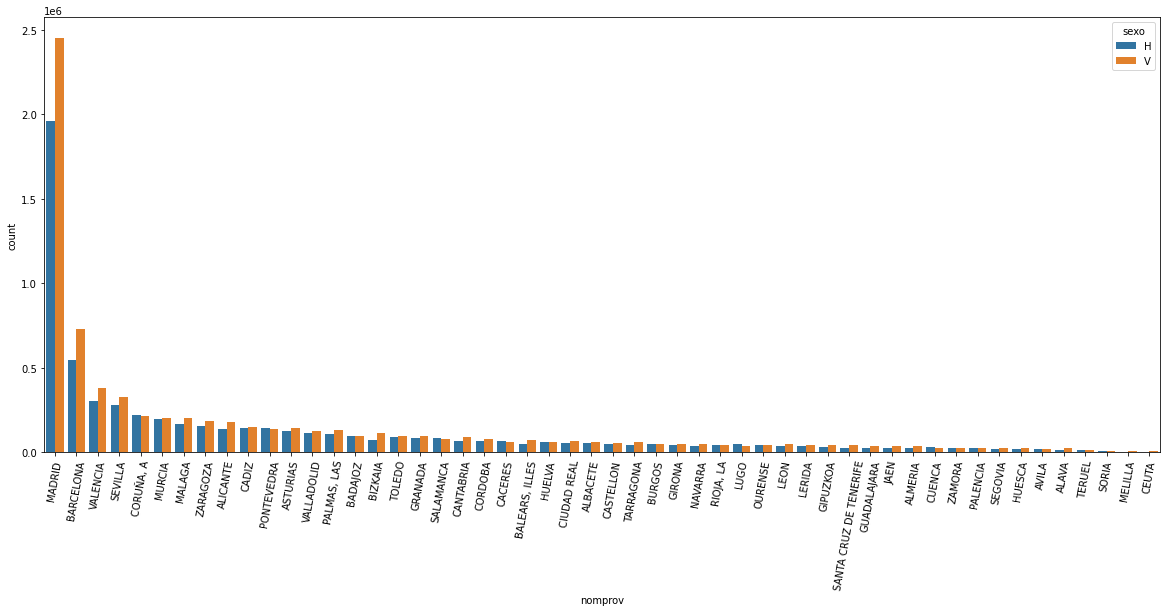

In [ ]:
# V = Hombres    H = Mujeres
f = plt.figure()
f.set_figwidth(19)
f.set_figheight(4)
fig = plt.figure(figsize =(20,8))
sns.countplot(x="nomprov",data=clientes,hue='sexo', order=clientes['nomprov'].value_counts().index)
plt.xticks(rotation=80)
plt.label='Ciudades'
plt.show()

# Interpretación:

Ciudades como Madrid, Barcelona, Valencia, Sevilla, Malanga tienen más usuarios femeninos que masculinos.

# ¿Existe alguna relación entre el segmento al que pertenecen los clientes y su lugar de residencia?

<Figure size 1368x288 with 0 Axes>

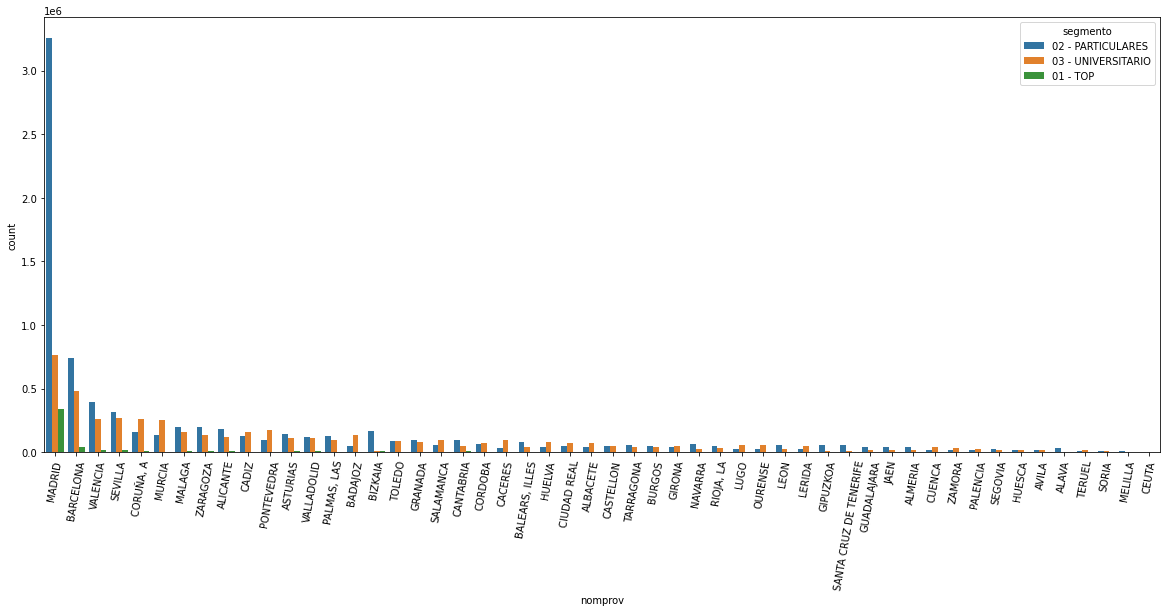

In [ ]:
# V = Hombres    H = Mujeres
f = plt.figure()
f.set_figwidth(19)
f.set_figheight(4)
fig = plt.figure(figsize =(20,8))
sns.countplot(x="nomprov",data=clientes,hue='segmento', order=clientes['nomprov'].value_counts().index)
plt.xticks(rotation=80)
plt.label='Ciudades'
plt.show()

# Interpretación:

Ciudades como Madrid, Barcelona, Valencia, Sevilla, Málaga, Zaragoza, Alicante tienen más clientes del segmento Particulares. Por su parte, el segmento particulares tiene preponderancia en Coruña, Murcia, Pontevedra.

> **ANÁLISIS NUMÉRICO VS TEMPORAL**
![](https://enciclopediaeconomica.com/wp-content/uploads/2019/01/icono-variable-cuantitativa.jpg)
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbir9JDIjRk-kpFWHtequxYtTIvjzdwBG-2Ngjm1h-Zha_XkoELyR2yQqc622-w7S7OvA&usqp=CAU)

# ¿Existe alguna relación entre la edad de los clientes y su fecha de alta?

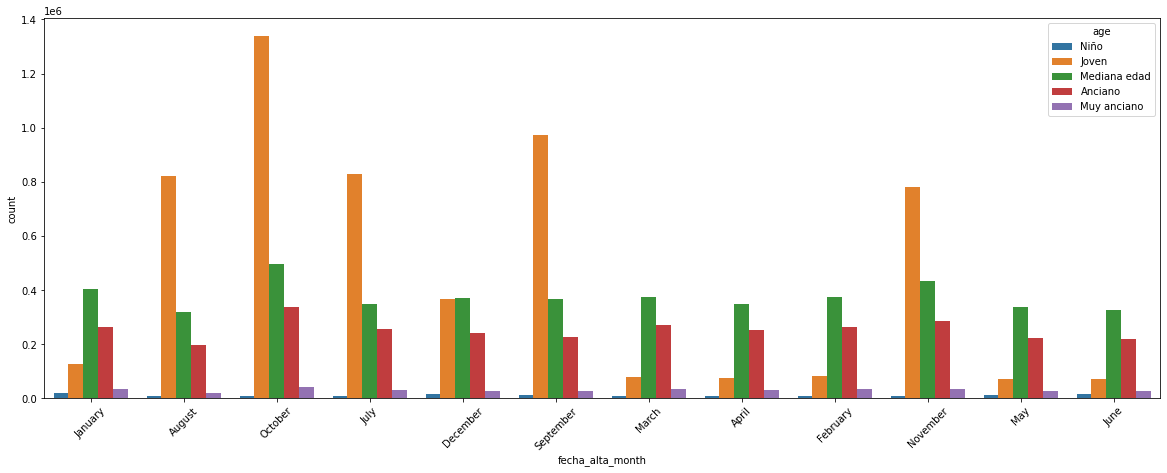

In [ ]:
#datos para el gráfico
clientes['fecha_alta_month'] = clientes['fecha_alta'].dt.strftime("%B")
bins = [0,18,33,50,80,200]
label =['Niño','Joven','Mediana edad','Anciano','Muy anciano']
clientes['age'] = pd.cut(clientes['age'], bins,labels = label)
fig = plt.figure(figsize =(20,7))
sns.countplot(x="fecha_alta_month",data=clientes,hue='age')
plt.xticks(rotation=45)
plt.title = 'Grupo de edad y fecha de alta'

# Interpretación:

Los usuarios jóvenes tienden a adquirir un producto del banco de julio a noviembre mientras que los usuarios de mediana edad tienden a darse de alta de enero a junio

**3.7 ANÁLISIS MULTIVARIADO**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPovJ0w-SEvAYJbKHcErzADJGgYyrWW7uGQw&usqp=CAU)

In [ ]:
#creamos el Dataframe data_productos
data_productos=pd.DataFrame(data={'Fecha':clientes.fecha_dato,'Cliente':clientes.ncodpers,'Ingreso':clientes.renta,'Edad':clientes.age,'Canal_entrada':clientes.canal_entrada,'Tipo_cliente':clientes.tiprel_1mes,'Antiguedad':clientes.antiguedad,'Indice_cliente':clientes.ind_nuevo,'Segmento':clientes.segmento,'Sexo':clientes.sexo,'Cuenta_ahorro':clientes.ind_ahor_fin_ult1,'Garantías':clientes.ind_aval_fin_ult1,'Cuentas_corriente':clientes.ind_cco_fin_ult1,'Cuenta_derivada':clientes.ind_cder_fin_ult1,'Cuenta_nómina':clientes.ind_cno_fin_ult1,'Cuenta_junior':clientes.ind_ctju_fin_ult1, 'Cuenta_mas_particular':clientes.ind_ctma_fin_ult1, 'Cuenta_particular':clientes.ind_ctop_fin_ult1, 'Cuenta_plus_en_particular':clientes.ind_ctpp_fin_ult1, 'Depósitos_corto_plazo':clientes.ind_deco_fin_ult1, 'Depósitos_mediano_plazo':clientes.ind_deme_fin_ult1, 'Depósito_largo_plazo':clientes.ind_dela_fin_ult1, 'Cuenta_electrónica':clientes.ind_ecue_fin_ult1, 'Fondos':clientes.ind_fond_fin_ult1, 'Hipoteca':clientes.ind_hip_fin_ult1, 'Pensiones':clientes.ind_plan_fin_ult1, 'Préstamos':clientes.ind_pres_fin_ult1, 'Impuestos':clientes.ind_reca_fin_ult1, 'Tarjeta_crédito':clientes.ind_tjcr_fin_ult1, 'Valores':clientes.ind_valo_fin_ult1, 'Cuenta_inicio':clientes.ind_viv_fin_ult1, 'Nómina_sueldos':clientes.ind_nomina_ult1, 'Nómina_pensiones':clientes.ind_nom_pens_ult1, 'Débito_directo':clientes.ind_recibo_ult1})
target_columns = ['Cuenta_ahorro','Garantías','Cuentas_corriente','Cuenta_derivada','Cuenta_nómina','Cuenta_junior','Cuenta_mas_particular','Cuenta_particular','Cuenta_plus_en_particular','Depósitos_corto_plazo','Depósitos_mediano_plazo','Depósito_largo_plazo','Cuenta_electrónica','Fondos','Hipoteca','Pensiones','Préstamos','Impuestos','Tarjeta_crédito','Valores','Cuenta_inicio','Nómina_sueldos','Nómina_pensiones','Débito_directo']


# ¿Qué paquete bancario es el más demandado?

In [ ]:
clientes["tot_products"] = clientes.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
clientes["tot_products"]   = pd.to_numeric(clientes["tot_products"], errors="coerce")
# Extraemos el número de clientes por el número total de productos que posee
clientes_a = clientes["tot_products"].value_counts()
clientes_a = pd.DataFrame(clientes_a)
# calculamos el porcentaje de clientes que utilizan diferentes cantidades de productos
count = clientes["ncodpers"].count()
clientes_a["percentage"] = (clientes_a["tot_products"]/count)*100
clientes_a

,tot_products,percentage
1.0,7169004,52.530532
0.0,2556239,18.730718
2.0,1930726,14.147302
3.0,770692,5.647209
4.0,450017,3.297478
5.0,289882,2.124096
6.0,210944,1.545682
7.0,141484,1.036717
8.0,76139,0.557905
9.0,33768,0.247433


Casi el 80% de los clientes poseen uno o dos productos. Solo una minoría (alrededor del 5%) utiliza más de cinco productos. Además, hay algunos clientes que están registrados como clientes pero que no usan ningún producto. 
Ahora exploremos qué producto es el más adquirido.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


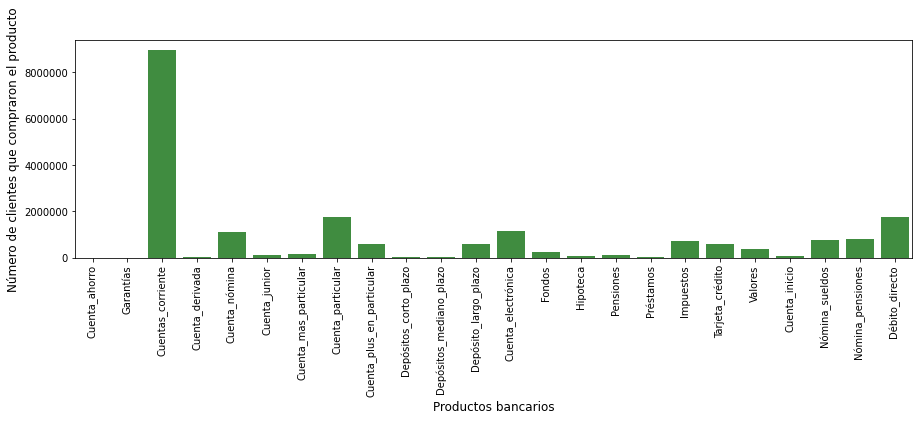

In [ ]:
#datos para el gráfico
target_columns = data_productos[target_columns].astype('float64').sum(axis=0)
#seteo del gráfico de barras
plt.figure(figsize=(15,4))
sns.barplot(target_columns.index, target_columns.values, alpha=0.8, color='green')
plt.xlabel('Productos bancarios', fontsize=12)
plt.ylabel('Número de clientes que compraron el producto', fontsize=12)
plt.ticklabel_format(style = 'plain', axis='y')
plt.xticks(rotation='vertical');

# Interpretación:

El producto más comprado es la cuenta_corriente seguida de la Cuenta_particular y el débito_directo. Las garantías y cuenta_ahorro son los menos adquiridos.

# ¿Cuál fue la tendencia de compra mensual?

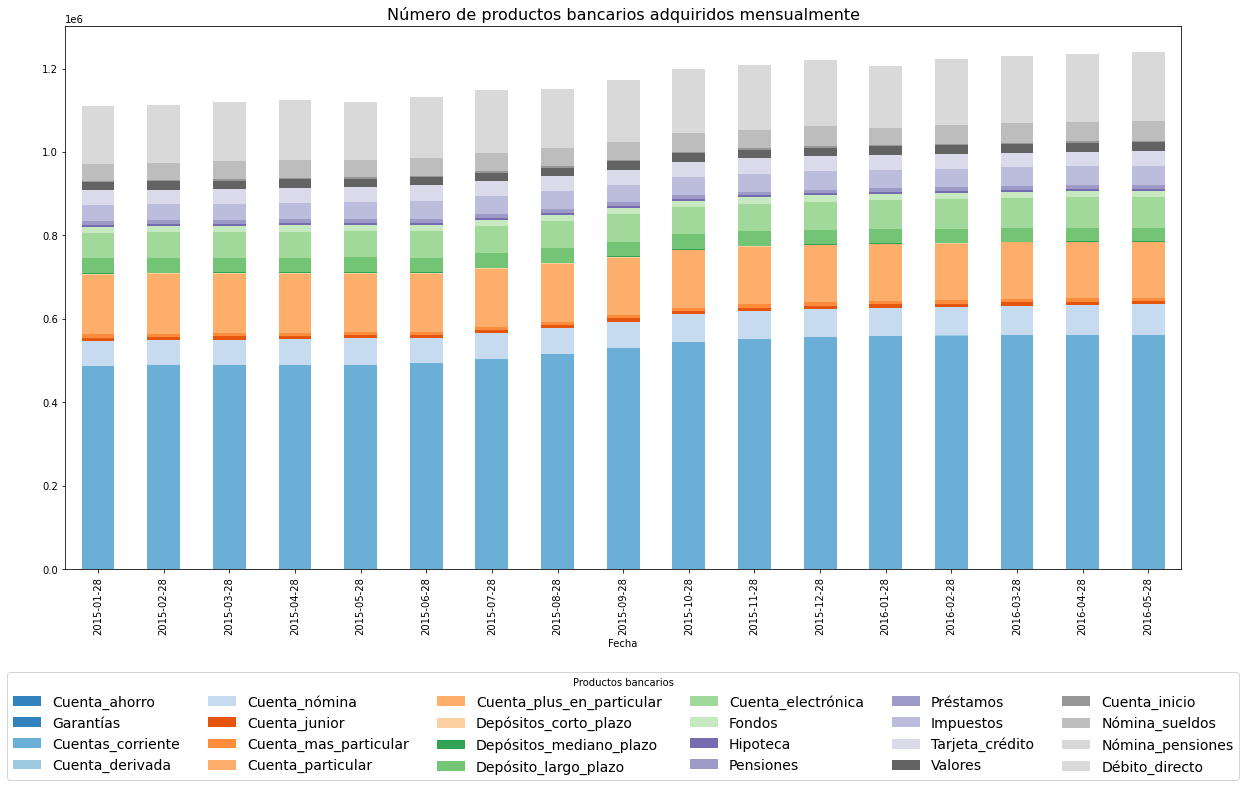

In [ ]:
#sacar las filas donde no se realiza ninguna compra nueva
data_productos = data_productos[(data_productos[target_columns].sum(axis=1) > 0)]
paquetes = data_productos[['Fecha']+target_columns].groupby('Fecha').sum()
paquetes.plot(kind='bar',stacked=True, colormap='tab20c',figsize=(20,10))
plt.legend(loc='lower center', title='Productos bancarios', bbox_to_anchor=(.5,-.4),ncol=6, fontsize=14)
plt.title('Número de productos bancarios adquiridos mensualmente', fontsize=16)
plt.show()

# Interpretación:

Se aprecian algunas tendencias de compra en este gráfico:
* El producto más adquirido es cuenta corriente que experimenta un crecimiento a lo largo de los meses.
* Los productos como Cuenta_ahorro, Garantías, Depósitos_corto_plazo no son muy populares, por lo que tenerlos en cuenta para realizar las predicciones podría ser contraproducente.
* El producto Depósito_corto_plazo se compró en 2015 y su popularidad disminuyó en 2016.
* Se aprecian clases de productos altamente desbalanceadas.

# ¿Existe relación entre el ingreso de los clientes y los paquetes adquiridos?

Dado que el grupo de clientes más representativo no son los estudiantes universitarios sino los particulares, puede resultar especialmente interesante analizar la distribución de los ingresos de nuestros clientes. Para ello, creemos determinadas categorías salariales y clasifimos adecuadamente a los clientes.

In [ ]:
#datos para el gráfico
data_productos_i = data_productos.groupby(pd.cut(data_productos['Ingreso'], [0,50000,100000,150000,250000, pd.np.inf], right=False)).sum()
#datos para el gráfico
data_productos_i = data_productos.groupby(pd.cut(data_productos['Ingreso'], [0,50000,100000,150000,250000, pd.np.inf], right=False)).sum()
#se seleccionan únicamente las columnas necesarias para el gráfico
data_productos_i = data_productos_i.loc[:,"Cuenta_ahorro": "Débito_directo"]
data_productos_i = data_productos_i.T
data_productos_i

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


Ingreso,"[0.0, 50000.0)","[50000.0, 100000.0)","[100000.0, 150000.0)","[150000.0, 250000.0)","[250000.0, inf)"
Cuenta_ahorro,46.0,224.0,288.0,442.0,249.0
Garantías,6.0,48.0,29.0,155.0,56.0
Cuentas_corriente,808051.0,2811684.0,1700722.0,1230126.0,559887.0
Cuenta_derivada,348.0,1266.0,1092.0,1312.0,526.0
Cuenta_nómina,71762.0,319447.0,253190.0,213556.0,95081.0
Cuenta_junior,4550.0,29528.0,32002.0,32810.0,12670.0
Cuenta_mas_particular,7265.0,35073.0,26573.0,22136.0,9104.0
Cuenta_particular,90906.0,455554.0,391871.0,375116.0,181218.0
Cuenta_plus_en_particular,26769.0,154047.0,135427.0,130010.0,62460.0
Depósitos_corto_plazo,1343.0,7060.0,5208.0,3432.0,1396.0


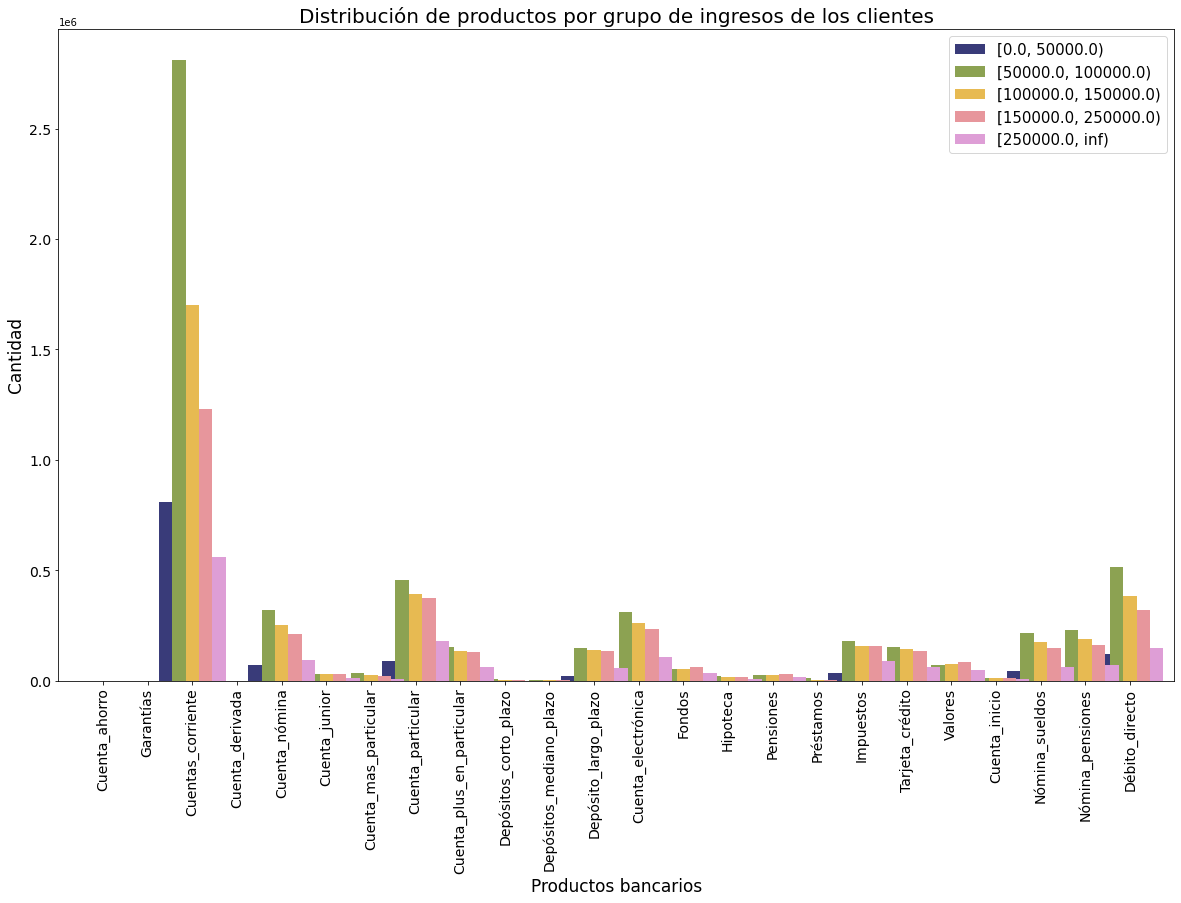

In [ ]:
#seteo del gráfico de barras
data_productos_i.plot(kind='bar', fontsize=14, figsize=[20,12], colormap='tab20b', width=1.5)
plt.title('Distribución de productos por grupo de ingresos de los clientes', fontsize=20, color='black') 
plt.xlabel('Productos bancarios', fontsize=17, color='black') 
plt.ylabel('Cantidad', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1);

# Interpretación:

Los clientes cuyos ingresos familiares se encuentran entre 50000 y 100000 son los usuarios que compraron más productos. La cuenta_corriente es el paquete más demandado, donde el grupo de clientes con ingresos 100000-250000 también contribuyen significativamente. 

# ¿Existe relación entre el género de los clientes y los paquetes adquiridos?

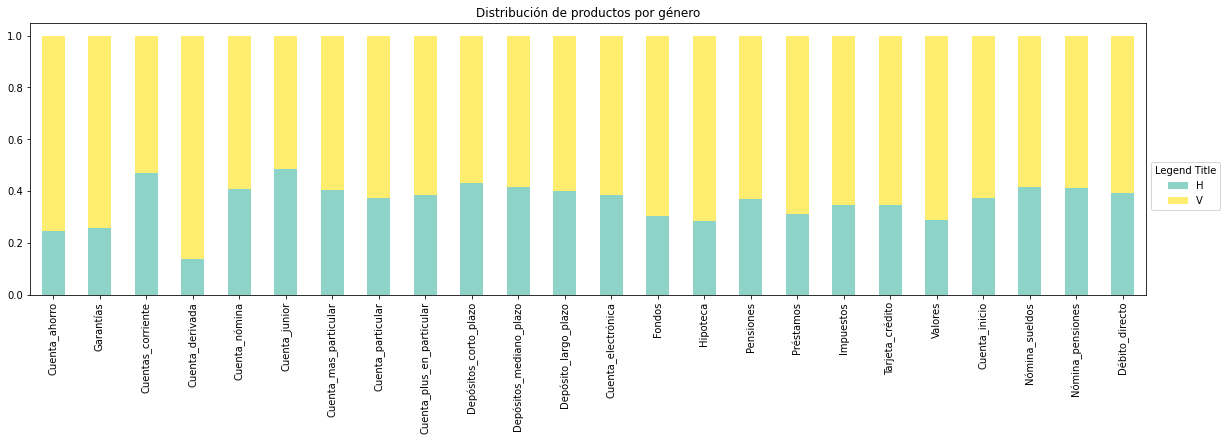

In [ ]:
# V = Hombres    H = Mujeres
#Plotting número de compras por cada género
genero = data_productos.drop('Cliente', axis=1).groupby('Sexo')[target_columns].sum()
genero = (genero/genero.sum()).T
genero.plot(kind='bar',stacked=True, colormap='Set3',figsize=(20,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Distribución de productos por género')
plt.show()

# Interpretación:

El género V (masculino) ha adquirido en promedio más productos que el género H (femenino). La distribución de género en la cuenta_derivada es muy sesgada, donde la mayor proporción de compra la ha realizado el género V.
Todos los paquetes muestran aproximadamente la misma proporción de participación de género y el género V es dominante en todas las compras de productos.

# ¿Existe relación entre la edad de los clientes y los paquetes adquiridos?

Al comienzo de la visualización de datos, hemos visto que la distribución de edad es bimodal, lo que significa que tenemos picos para estudiantes universitarios y personas de mediana edad. Pero esto fue solo para ver quiénes son nuestros clientes. Ahora queremos ver quién usa/posee nuestros productos. ¿Hay algún "grupo de edad" en particular que posea más que otro?

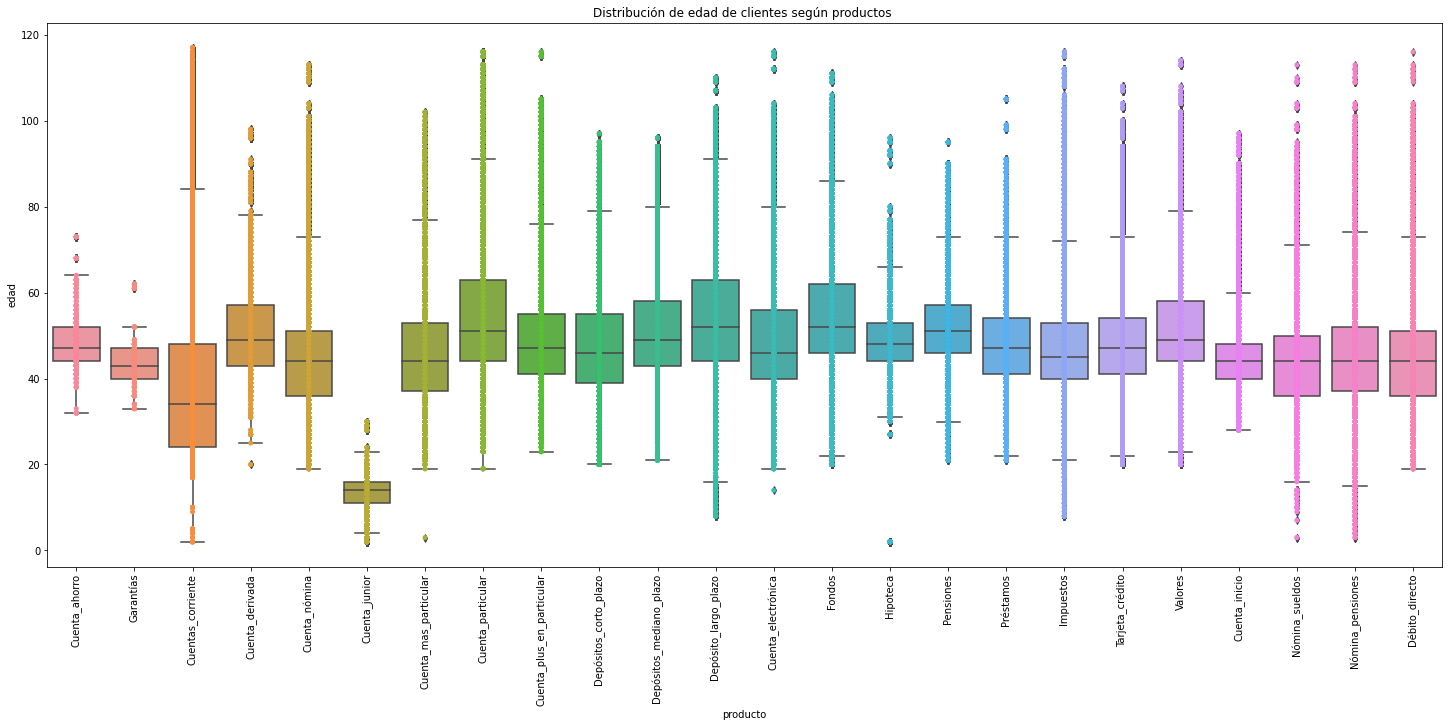

In [ ]:
clientes.rename(columns={"age":"edad","ind_ahor_fin_ult1":"Cuenta_ahorro","ind_aval_fin_ult1":"Garantías","ind_cco_fin_ult1":"Cuentas_corriente","ind_cder_fin_ult1":"Cuenta_derivada","ind_cno_fin_ult1":"Cuenta_nómina","ind_ctju_fin_ult1":"Cuenta_junior","ind_ctma_fin_ult1":"Cuenta_mas_particular", "ind_ctop_fin_ult1":"Cuenta_particular", "ind_ctpp_fin_ult1":"Cuenta_plus_en_particular", "ind_deco_fin_ult1":"Depósitos_corto_plazo", "ind_deme_fin_ult1":"Depósitos_mediano_plazo", "ind_dela_fin_ult1":"Depósito_largo_plazo", "ind_ecue_fin_ult1":"Cuenta_electrónica", "ind_fond_fin_ult1":"Fondos", "ind_hip_fin_ult1":"Hipoteca", "ind_plan_fin_ult1":"Pensiones", "ind_pres_fin_ult1":"Préstamos", "ind_reca_fin_ult1":"Impuestos", "ind_tjcr_fin_ult1":"Tarjeta_crédito", "ind_valo_fin_ult1":"Valores", "ind_viv_fin_ult1":"Cuenta_inicio", "ind_nomina_ult1":"Nómina_sueldos", "ind_nom_pens_ult1":"Nómina_pensiones", "ind_recibo_ult1":"Débito_directo"}, errors="raise", inplace=True)
#se cambia el tipo de dato de la columna age
from numpy import nan as NA
clientes.dropna()
clientes["edad"] = pd.to_numeric(clientes["edad"],errors = 'coerce')
target_columns = ['Cuenta_ahorro','Garantías','Cuentas_corriente','Cuenta_derivada','Cuenta_nómina','Cuenta_junior','Cuenta_mas_particular','Cuenta_particular','Cuenta_plus_en_particular','Depósitos_corto_plazo','Depósitos_mediano_plazo','Depósito_largo_plazo','Cuenta_electrónica','Fondos','Hipoteca','Pensiones','Préstamos','Impuestos','Tarjeta_crédito','Valores','Cuenta_inicio','Nómina_sueldos','Nómina_pensiones','Débito_directo']
target_columns = clientes[target_columns].astype('float64')
clientes_edad = pd.DataFrame(columns=['edad', 'producto'])
for col in target_columns:
    df = pd.DataFrame({'edad':clientes.edad[clientes[col] == 1],
                     'producto':col})
    clientes_edad = pd.concat([clientes_edad, df])
#Definición del tipo de gráfico
def stripplot(data, title, figsize):
    plt.figure(figsize=figsize)
    plt.title(title)
    y = data.columns[0]
    x = data.columns[1]
    sns.stripplot(x=x, y=y, data=data, jitter=False, dodge=True)
    sns.boxplot(x=x, y=y, data=data)
    plt.xticks(rotation = 90)
    plt.show()
def allplots(data, title, kind='stripplot', figsize=(10,2.5)):
    if kind == 'stripplot':
        stripplot(data, title, figsize)
#Plotting Distribución de edad de clientes basada en productos de interés
figsize=(25,10)
title = 'Distribución de edad de clientes según productos '
allplots(data = clientes_edad, title = title, kind='stripplot', figsize=figsize)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


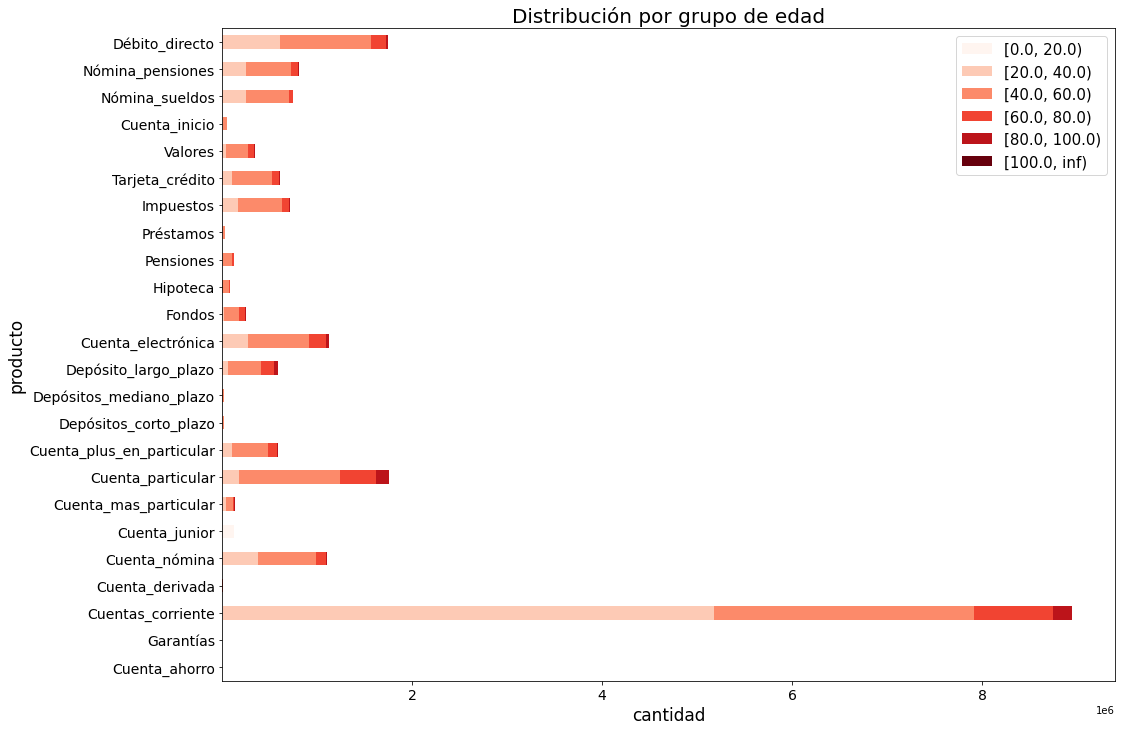

In [ ]:
#datos para el gráfico
data_productos_e = data_productos.groupby(pd.cut(data_productos['Edad'], [0,20,40,60,80,100, pd.np.inf], right=False)).sum()
#se seleccionan únicamente las columnas necesarias para el gráfico
data_productos_e = data_productos_e.loc[:,"Cuenta_ahorro": "Débito_directo"]
data_productos_e = data_productos_e.T
# Plot of customers' age distibution of each product 
data_productos_e.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Reds')
plt.title('Distribución por grupo de edad', fontsize=20, color='black') 
plt.xlabel('cantidad', fontsize=17, color='black') 
plt.ylabel('producto', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

In [ ]:
data_productos_e

Edad,"[0.0, 20.0)","[20.0, 40.0)","[40.0, 60.0)","[60.0, 80.0)","[80.0, 100.0)","[100.0, inf)"
Cuenta_ahorro,0.0,28.0,1260.0,108.0,0.0,0.0
Garantías,0.0,77.0,222.0,17.0,0.0,0.0
Cuentas_corriente,9597.0,5168565.0,2737174.0,822953.0,200863.0,6436.0
Cuenta_derivada,0.0,555.0,3621.0,1030.0,170.0,0.0
Cuenta_nómina,9.0,381418.0,611781.0,97206.0,13117.0,89.0
Cuenta_junior,127675.0,1374.0,248.0,0.0,0.0,0.0
Cuenta_mas_particular,3.0,44702.0,66707.0,17792.0,3523.0,15.0
Cuenta_particular,6.0,181427.0,1056006.0,379789.0,136984.0,6404.0
Cuenta_plus_en_particular,0.0,100603.0,385693.0,87112.0,17243.0,357.0
Depósitos_corto_plazo,0.0,6431.0,13487.0,3587.0,770.0,0.0


# Interpretación: 

En general, puede apreciarse que los clientes con edades entre 40-60 son los que más contratan paquetes de servicios. La mediana, generalmente, se encuentra en el rango de 40-45 años de edad. La edad promedio para la cuenta junior es significativamente menor que otras, como se esperaba.Todos los gráficos presentan valores anómales, los cuales serán estudiados en posteriores análisis. 
Las cuentas corrientes son propiedad principalmente de la categoría de edad entre 20 y 40 años. Otros productos como las Cuentas Particulares, por otro lado, son propiedad de clientes entre 40 y 60 años. De esto podemos concluir que las Cuentas Corrientes interesan a los clientes jóvenes, mientras que otros productos de Santander tienden a atraer a la clientela de mayor edad.

# ¿Cómo es el comportamiento de compra de clientes nuevos y antiguos?

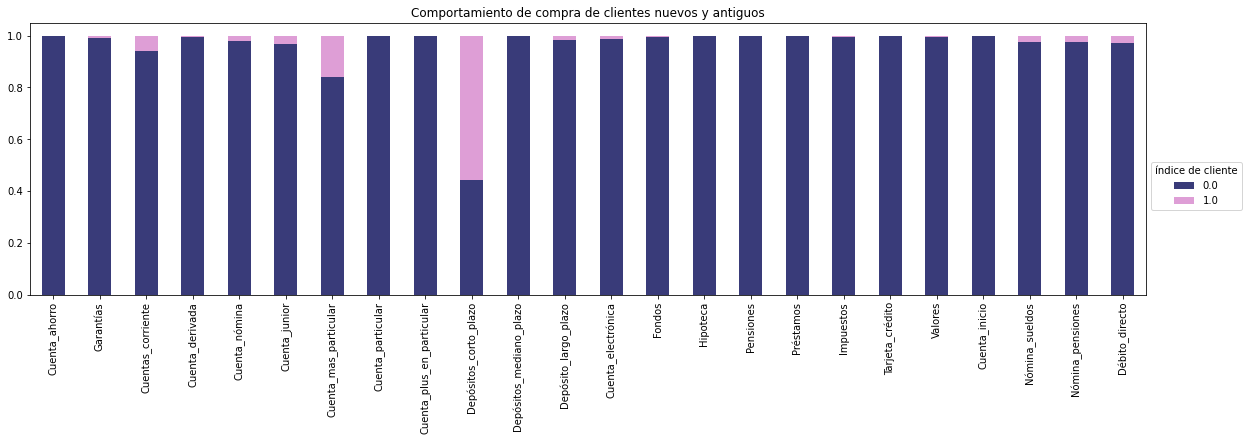

In [ ]:
#ind_nuevo: Índice de nuevos clientes. 1 si el cliente se registró en los últimos 6 meses.
#plotting comportamiento de compra de clientes nuevos y antiguos
indice = data_productos.drop('Cliente', axis=1).groupby('Indice_cliente')[target_columns].sum()
indice = (indice/indice.sum()).T
indice.plot(kind='bar',stacked=True, colormap='tab20b',figsize=(20,5))
plt.legend(loc='center left', title='índice de cliente', bbox_to_anchor=(1, .4))
plt.title('Comportamiento de compra de clientes nuevos y antiguos')
plt.show()


# Interpretación:

Los nuevos clientes (antigüedad menor a 6 meses) son los que más compran depositos_corto_plazo, cuenta_junior y cuenta_corriente.
Hay muy poca participación en todos los demás productos por parte de nuevos clientes.
Los nuevos clientes no han adquirido cuenta de ahorro, cuenta particular, cuenta_plus_particular y depósitos_mediano_plazo.

# ¿Cómo es el comportamiento de compra de clientes según el segmento al que pertenecen?

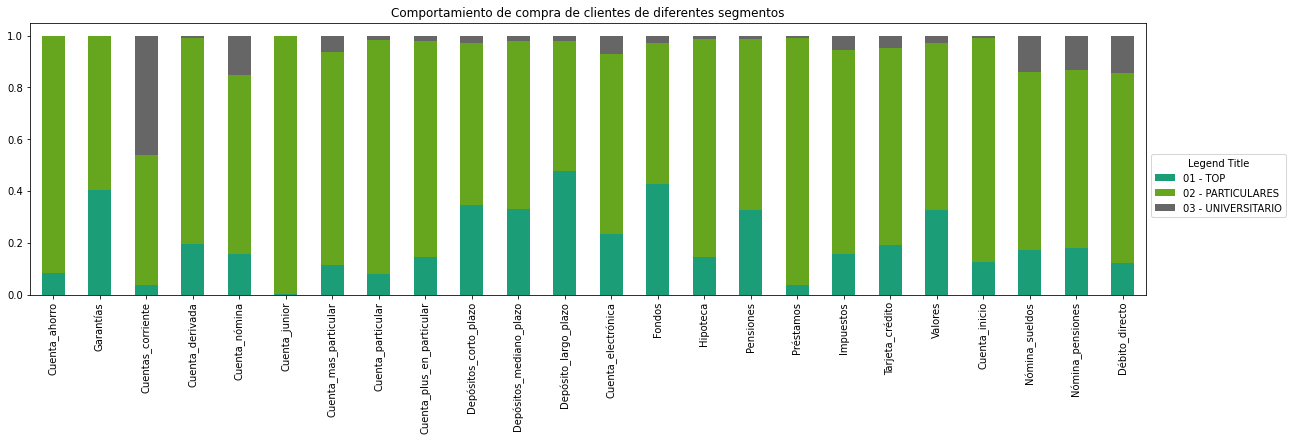

In [ ]:
segmento = data_productos.drop('Cliente', axis=1).groupby('Segmento')[target_columns].sum()
segmento = (segmento/segmento.sum()).T
segmento.plot(kind='bar',stacked=True, colormap='Dark2',figsize=(20,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Comportamiento de compra de clientes de diferentes segmentos')
plt.show()

# Interpretación:

Particulares es el segmento dominante de los clientes en todos los paquetes de productos. El producto cuenta junior ha sido adquirido únicamente por este segmento. 
Los clientes del segmento Top tienen el ingreso promedio más alto y el segmento Universitario el menor poder adquisitivo.

# ¿Existe relación entre el canal de entrada y los paquetes adquiridos?

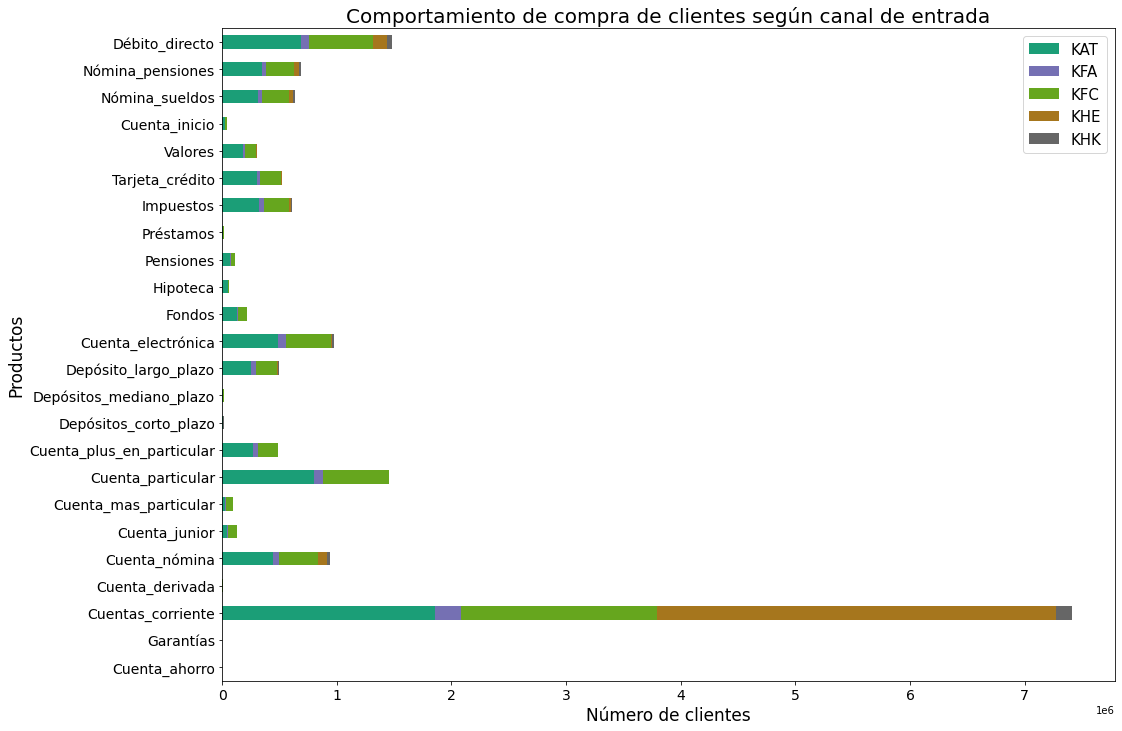

In [ ]:
# Extraemos las columnas necesarias para este gráfico
clientes_a = clientes.loc[:, ['canal_entrada']].join(data_productos[target_columns])
# Subdividamos los datos para mantener solo los registros de los cinco canales principales
subset = ["KHE", "KAT", "KFC", "KFA", "KHK"]
clientes_a = clientes_a.loc[clientes_a['canal_entrada'].isin(subset)]
clientes_a = clientes_a.groupby("canal_entrada").agg("sum")
clientes_a = clientes_a.T
# Canales utilizados por el cliente para unirse y los productos adquiridos
clientes_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Dark2')
plt.title('Comportamiento de compra de clientes según canal de entrada', fontsize=20, color='black') 
plt.xlabel('Número de clientes', fontsize=17, color='black') 
plt.ylabel('Productos', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

# Interpretación

Las cuentas corrientes vienen predominantemente a través del canal "KHE", mientras que esto es poco relevante para todos los demás productos. Para productos como Cuentas Particulares, los canales "KAT" y "KFC" cobran especial relevancia. En base a estos hallazgos, podemos comprender mucho mejor nuestro enfoque hacia el cliente.

# ¿Existe relación entre la antiguedad de los clientes y los paquetes adquiridos?

Como queremos optimizar nuestras recomendaciones de productos para los clientes existentes, tenemos que observar la distribución por antigüedad (es decir, cuánto tiempo han sido clientes) del uso de nuestros productos. ¿Se nota alguna diferencia entre los productos? Si es así, sería muy interesante para nosotros ver qué productos se utilizan en qué etapa de la vida del cliente.

In [ ]:
clientes.dropna()
#clientes.dropna()
#clientes["antiguedad"] = pd.to_numeric(clientes["antiguedad"],errors = 'coerce')
# Let's extract the necessary columns for this step
clientes_a = clientes.loc[:, ['antiguedad']].join(data_productos[target_columns])
# Let's create seniority groups
clientes_a = (clientes_a.groupby(pd.cut(clientes_a['antiguedad'], [0,50,100,150,200, pd.np.inf], right=False)).sum())
clientes_a.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # Remove the CWD from sys.path while we load stuff.


,antiguedad,Cuenta_ahorro,Garantías,Cuentas_corriente,Cuenta_derivada,Cuenta_nómina,Cuenta_junior,Cuenta_mas_particular,Cuenta_particular,Cuenta_plus_en_particular,...,Hipoteca,Pensiones,Préstamos,Impuestos,Tarjeta_crédito,Valores,Cuenta_inicio,Nómina_sueldos,Nómina_pensiones,Débito_directo
antiguedad,,,,,,,,,,,,,,,,,,,,,
"[0.0, 50.0)",159222027.0,0,5,5048546,293,363997,37849,40734,176,152,...,465,6406,588,105986,79938,25239,70,226825.0,239977.0,620823
"[50.0, 100.0)",139932079.0,0,65,1138353,581,139996,21429,87365,33367,263897,...,952,8190,7594,100150,85880,39578,2522,92325.0,99901.0,221175
"[100.0, 150.0)",259088006.0,430,52,1205443,1945,194006,53304,1423,565936,108593,...,24486,21034,18053,171624,132409,70244,15895,134014.0,145223.0,300720
"[150.0, 200.0)",366480380.0,694,107,1160804,1793,268763,16467,1732,984695,148050,...,36083,49797,5547,216287,200959,130578,22121,194203.0,213511.0,400748
"[200.0, inf)",156427150.0,272,87,385000,760,136234,0,1003,175209,69963,...,18120,39650,2741,112741,106364,83668,11876,98368.0,111227.0,201317


NameError: name 'inf' is not defined

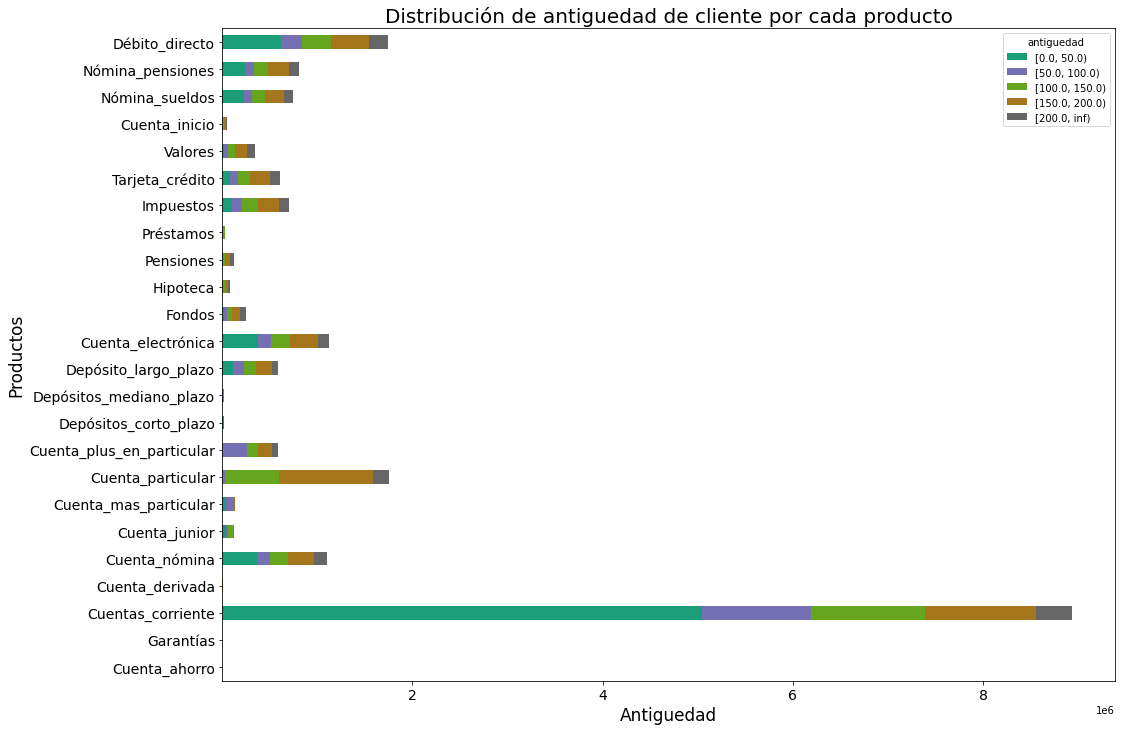

In [ ]:
exclude = ["antiguedad"]
clientes_a = clientes_a.drop(exclude, axis=1).T
# Customers' seniority distribution of each product
clientes_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Dark2')
plt.title('Distribución de antiguedad de cliente por cada producto', fontsize=20, color='black') 
plt.xlabel('Antiguedad', fontsize=17, color='black') 
plt.ylabel('Productos', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 

# Interpretación

Los resultados obtenidos de este análisis son muy interesantes. Las Cuentas Corrientes son predominantemente adquiridas/utilizadas por clientes que se convirtieron en nuestros clientes hace menos de 50 meses. Para algunos otros productos (por ejemplo, Cuentas Particulares), los clientes muy antiguos (entre 150 y 200 meses) son dominantes. De esto podemos concluir que nuestras Cuentas Corrientes parecen ser un producto importante a la hora de acercarse a nuevos clientes.

# ¿Cómo es el comportamiento de compra según el tipo de relación del cliente?

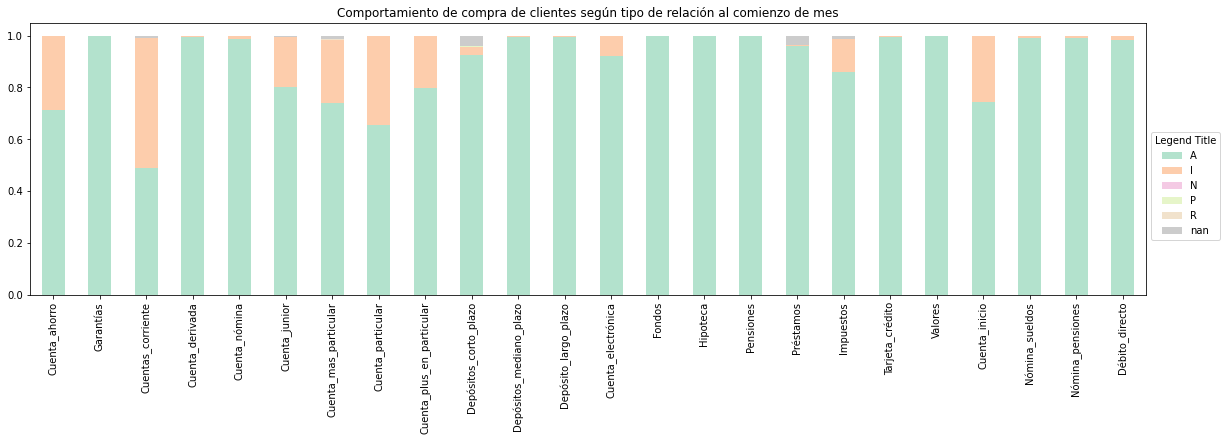

In [ ]:
#Tipo de cliente al comienzo del mes, A (active), I (inactive), P (former customer),R (Potential)
##Plotting distribution of different types of customers
data_productos.Tipo_cliente = data_productos.Tipo_cliente.astype(str) 
tipo = data_productos.drop('Cliente', axis=1).groupby('Tipo_cliente')[target_columns].sum()
tipo = (tipo/tipo.sum()).T
tipo.plot(kind='bar',stacked=True, colormap='Pastel2',figsize=(20,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Comportamiento de compra de clientes según tipo de relación al comienzo de mes')
plt.show()

# Observación:

Clientes con relación faltante han comprado mayoritariamente depósitos_corto_plazo y préstamos.
Los antiguos activos son los que más han comprado productos diversos predominando fondos, hipotecas, pensiones y valores.


# Distribución de productos comprados cada mes

In [ ]:
#Function to sum all values of the product columns

#https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns/53096340
def f(x):
    d = {}
    d['ahor'] = x['ind_ahor_fin_ult1'].sum()
    d['aval'] = x['ind_aval_fin_ult1'].sum()
    d['cco'] = x['ind_cco_fin_ult1'].sum()
    d['cder'] = x['ind_cder_fin_ult1'].sum()
    d['cno'] = x['ind_cno_fin_ult1'].sum()
    d['ctju'] = x['ind_ctju_fin_ult1'].sum()
    d['ctma'] = x['ind_ctma_fin_ult1'].sum()
    d['ctop'] = x['ind_ctop_fin_ult1'].sum()
    d['ctpp'] = x['ind_ctpp_fin_ult1'].sum()
    d['deco'] = x['ind_deco_fin_ult1'].sum()
    d['deme'] = x['ind_deme_fin_ult1'].sum()
    d['dela'] = x['ind_dela_fin_ult1'].sum()
    d['ecue'] = x['ind_ecue_fin_ult1'].sum()
    d['fond'] = x['ind_fond_fin_ult1'].sum()
    d['hip'] = x['ind_hip_fin_ult1'].sum()
    d['plan'] = x['ind_plan_fin_ult1'].sum()
    d['pres'] = x['ind_pres_fin_ult1'].sum()
    d['reca'] = x['ind_reca_fin_ult1'].sum()
    d['tjcr'] = x['ind_tjcr_fin_ult1'].sum()
    d['valo'] = x['ind_valo_fin_ult1'].sum()
    d['viv'] = x['ind_viv_fin_ult1'].sum()
    d['nomina'] = x['ind_nomina_ult1'].sum()
    d['nom_pens'] = x['ind_nom_pens_ult1'].sum()
    d['recibo'] = x['ind_recibo_ult1'].sum()
    return pd.Series(d, index=['ahor', 'aval', 'cco', 'cder', 'cno','ctju','ctma','ctop','ctpp','deco','deme','dela','ecue','fond','hip','plan','pres','reca','tjcr','valo','viv','nomina','nom_pens','recibo'])

In [ ]:
products = clientes.groupby('fecha_dato').apply(f).columns
dates = clientes.fecha_dato.unique()

In [ ]:
# count of products purchased every month
clientes.groupby('fecha_dato').apply(f)

,ahor,aval,cco,cder,cno,ctju,ctma,ctop,ctpp,deco,...,hip,plan,pres,reca,tjcr,valo,viv,nomina,nom_pens,recibo
fecha_dato,,,,,,,,,,,,,,,,,,,,,
2015-01-28,88.0,19.0,487855.0,301.0,58763.0,7757.0,8418.0,106471.0,36195.0,1513.0,...,5007.0,7430.0,2349.0,38288.0,35613.0,20263.0,3234.0,38995.0,43331.0,95601.0
2015-02-28,89.0,20.0,488658.0,301.0,60028.0,7690.0,8228.0,106043.0,36040.0,2055.0,...,4998.0,7407.0,2344.0,38507.0,34352.0,20198.0,3219.0,40746.0,44810.0,94543.0
2015-03-28,89.0,21.0,489074.0,315.0,60929.0,7674.0,7875.0,105688.0,35847.0,2396.0,...,4988.0,7384.0,2340.0,38727.0,34990.0,20020.0,3196.0,42967.0,44109.0,97211.0
2015-04-28,87.0,21.0,489069.0,313.0,62221.0,7653.0,7482.0,105167.0,35650.0,2439.0,...,4968.0,7370.0,2346.0,39603.0,35988.0,19939.0,3173.0,42443.0,46593.0,98312.0
2015-05-28,85.0,21.0,489737.0,313.0,63391.0,7647.0,7096.0,104947.0,35499.0,2075.0,...,4797.0,7363.0,2342.0,39946.0,35880.0,19955.0,3155.0,41383.0,42458.0,96487.0
2015-06-28,83.0,21.0,494027.0,316.0,59845.0,7596.0,6920.0,104602.0,35342.0,1803.0,...,4721.0,7363.0,2040.0,42888.0,36550.0,19675.0,3138.0,43524.0,47703.0,98655.0
2015-07-28,82.0,19.0,503903.0,320.0,61607.0,7582.0,6939.0,104288.0,35145.0,1845.0,...,4707.0,7345.0,2024.0,41779.0,37159.0,19699.0,3128.0,44937.0,49589.0,99981.0
2015-08-28,82.0,19.0,514827.0,323.0,62997.0,7556.0,6993.0,104053.0,35010.0,1909.0,...,4693.0,7346.0,2023.0,42021.0,36820.0,19949.0,3108.0,42788.0,47060.0,96045.0
2015-09-28,81.0,19.0,529608.0,319.0,63759.0,7521.0,7180.0,103680.0,34795.0,1982.0,...,4682.0,7343.0,2024.0,42267.0,36248.0,20155.0,3090.0,43673.0,47998.0,100726.0


100%|██████████| 17/17 [02:14<00:00,  7.93s/it]


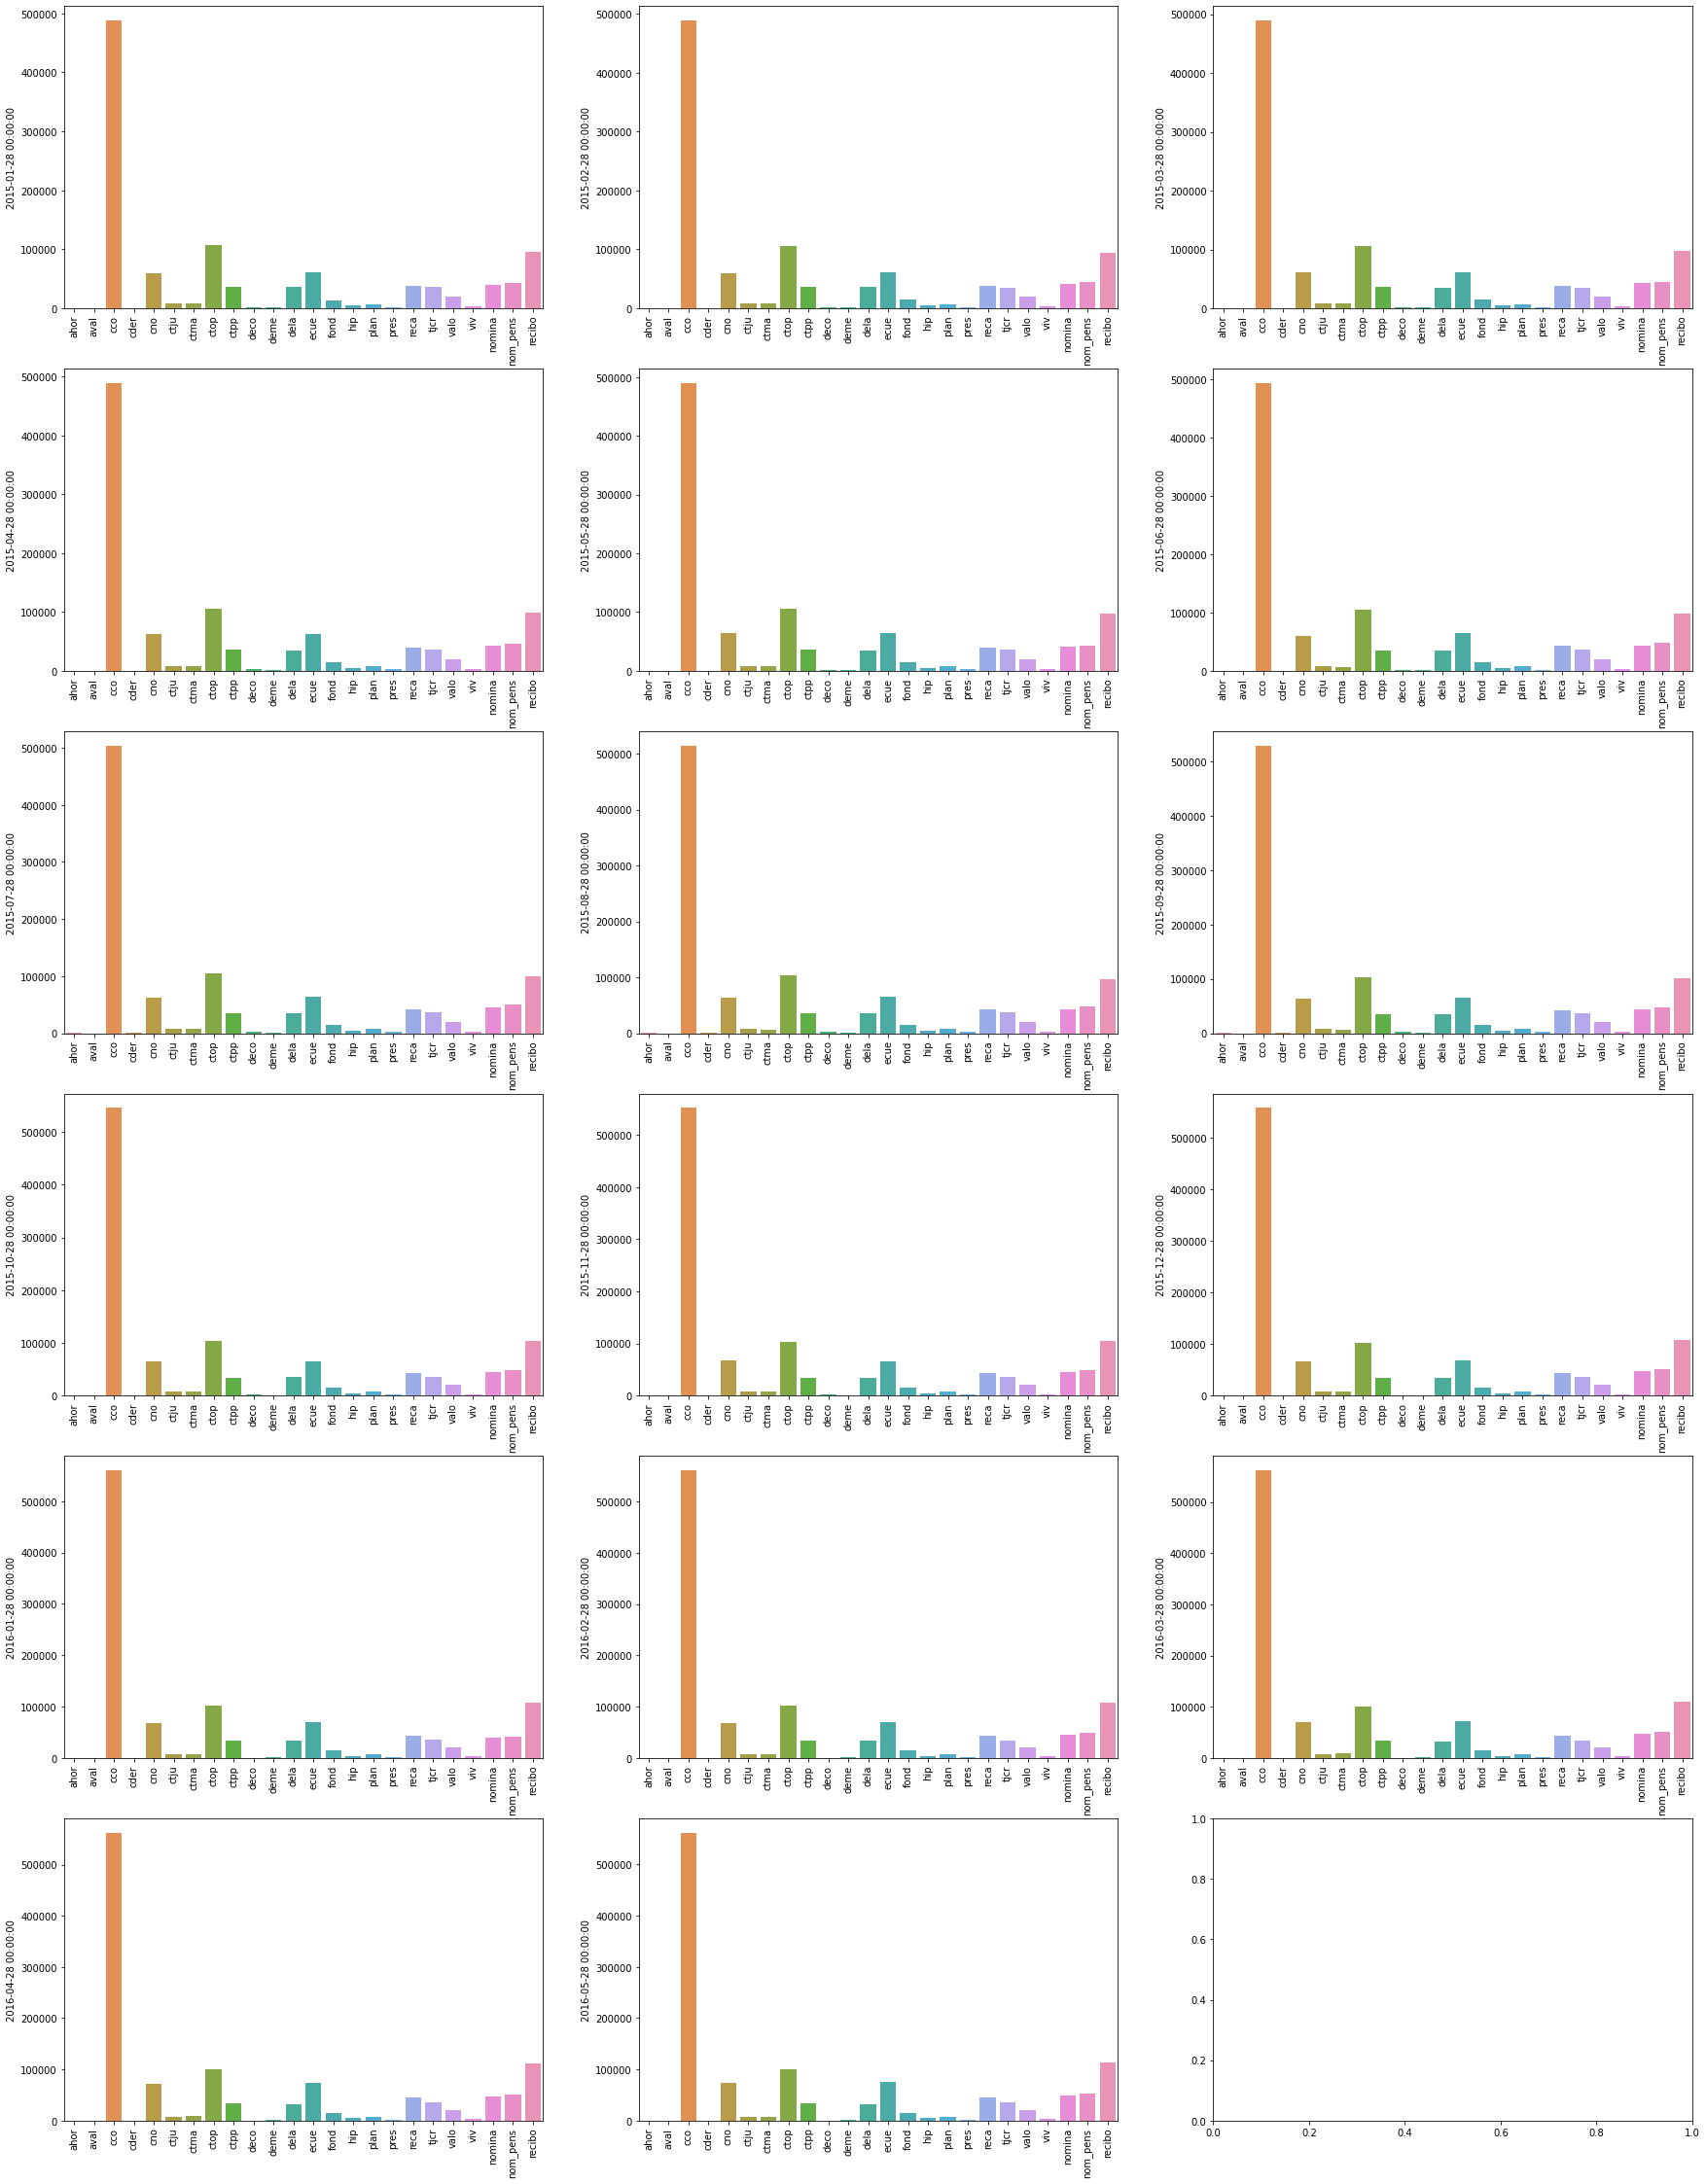

In [ ]:
from tqdm import tqdm
#plot of distribution of products purchased every month
a=0
b=0
fig, ax = plt.subplots(6, 3,figsize=(30,40))
for i in tqdm(dates):
    if(b>2):
        b=0
        a+=1
    sns.barplot(x = products, y  = clientes.groupby('fecha_dato').apply(f).loc[i], ax = ax[a,b])
    plt.setp(ax[a,b].xaxis.get_majorticklabels(), rotation=90)
    b+=1
plt.show()

# Observación:

* El producto cuentas_corrientes (cco) es el que más se compra cada mes.
* Los productos cuenta_ahorro (ahor) y garantías (aval) fueron los menos adquiridos cada mes.

> **ANÁLISIS DE COMPONENTES PRINPIPALES (PCA)**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwSQUSTf4Yq8Qfpyxu-fA-1COozfvYm9cuq9JVfNvy6CjaeK5vRmJhbQqaHmVsqIlpBeo&usqp=CAU)

In [ ]:
clientes.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

Se propone realizar un Análisis de Componentes Principales (en adelante ACP). ACP es un procedimiento matemático/estadístico que busca reducir la dimensionalidad del dataset máximizando la varianza explicada.
El ACP es aplicable a variables de naturaleza numérica y por lo tanto, es aplicable a las siguientes columnas:

In [ ]:
clientes_ACP = clientes[[
       'ncodpers', 'age', 'ind_nuevo', 'antiguedad', 'indrel','tipodom', 'cod_prov',
       'ind_actividad_cliente', 'renta'
]]
clientes_ACP.head()

,ncodpers,age,ind_nuevo,antiguedad,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
0,1375586,35.0,0.0,6.0,1.0,1.0,29.0,1.0,87218.10
1,1050611,23.0,0.0,35.0,1.0,1.0,13.0,0.0,35548.74
2,1050612,23.0,0.0,35.0,1.0,1.0,13.0,0.0,122179.11
3,1050613,22.0,0.0,35.0,1.0,1.0,50.0,0.0,119775.54
4,1050614,23.0,0.0,35.0,1.0,1.0,50.0,1.0,134254.00


**Es necesario verificar que no existan datos faltantes antes de comenzar con el PCA.**

In [ ]:
clientes_ACP.isna().sum()

ncodpers                     0
age                          0
ind_nuevo                27734
antiguedad                   0
indrel                   27734
tipodom                  27735
cod_prov                 93591
ind_actividad_cliente    27734
renta                        0
dtype: int64

In [ ]:
clientes_ACP = clientes_ACP.dropna() # Elimina NAs
clientes_ACP.isna().sum()

ncodpers                 0
age                      0
ind_nuevo                0
antiguedad               0
indrel                   0
tipodom                  0
cod_prov                 0
ind_actividad_cliente    0
renta                    0
dtype: int64

**También, y con el objetivo de reducir posibles sezgos, se recomienda normalizar la información previamente.**

In [ ]:
# Inicilización del scaler
scaler = StandardScaler()
# Fit Transform
clientes_ACP[clientes_ACP.columns] = scaler.fit_transform(clientes_ACP[clientes_ACP.columns]) # clientes_ACP con los datos normalizados
clientes_ACP.head()

,ncodpers,age,ind_nuevo,antiguedad,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
0,1.248736,-0.299277,-0.25229,-0.051360,-0.042777,0.0,0.189966,1.089308,-0.227921
1,0.495814,-0.997133,-0.25229,-0.030448,-0.042777,0.0,-1.061597,-0.918014,-0.478297
2,0.495816,-0.997133,-0.25229,-0.030448,-0.042777,0.0,-1.061597,-0.918014,-0.058509
3,0.495818,-1.055287,-0.25229,-0.030448,-0.042777,0.0,1.832642,-0.918014,-0.070156
4,0.495821,-0.997133,-0.25229,-0.030448,-0.042777,0.0,1.832642,1.089308,0.000003


**Con los datos normalizados, se esta en condiciones de obtener los componentes principales.**

In [ ]:
# Inicilización del scaler
pca = PCA(random_state=42) # Valor semilla

In [ ]:
# Fit
pca.fit(clientes_ACP)

PCA(random_state=42)

In [ ]:
print(pca.components_.round(2)) 

[[ 0.65 -0.6   0.39 -0.06  0.06 -0.   -0.08 -0.22 -0.11]
 [ 0.03  0.15  0.49 -0.01  0.54 -0.    0.42  0.45  0.25]
 [ 0.05 -0.05  0.   -0.13 -0.44 -0.    0.63  0.26 -0.56]
 [ 0.07 -0.06  0.14 -0.44 -0.54 -0.   -0.23  0.44  0.49]
 [-0.07  0.07 -0.14 -0.89  0.32 -0.    0.05 -0.25 -0.13]
 [ 0.03 -0.09 -0.14  0.04 -0.18 -0.    0.6  -0.49  0.59]
 [-0.14  0.46  0.7  -0.03 -0.28 -0.   -0.08 -0.43 -0.12]
 [-0.74 -0.63  0.25 -0.02  0.01  0.    0.01 -0.03 -0.02]
 [ 0.    0.    0.   -0.    0.    1.   -0.    0.    0.  ]]


**Devuelve 9 componentes principales (coincidente con el número de columnas). Se trata de los autovectores y que representan la información en una nueva "base".**

In [ ]:
# Indicamos el ratio de varianza explicada por cada componente (la sumatoria será igual a 1)
pca.explained_variance_ratio_.round(2)

array([0.23, 0.13, 0.13, 0.13, 0.12, 0.12, 0.1 , 0.04, 0.  ])

A primera vista, se tiene que, por ejemplo, con los 6 primeros componentes principales se explica un 86% de la varianza en los datos; lo cual es aceptable y se logra reducir la dimensionalidad apreciablemente (de 9 a 6)

In [ ]:
# Varianza acumulada por las componentes
var_acum = np.cumsum(pca.explained_variance_ratio_)
print(var_acum)

[0.22937966 0.35829031 0.48532443 0.61095112 0.7353198  0.85474836
 0.95565111 1.         1.        ]


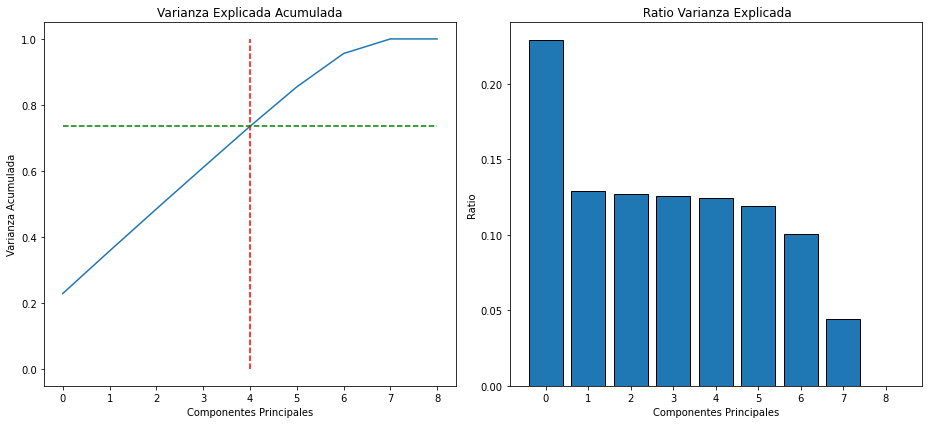

In [ ]:
# Graficamente
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

# Varianza acumulada
ax[0].plot(var_acum)

# Líneas de guía
ax[0].vlines(x=4, ymax=1, ymin=0, colors='r', linestyles='--')
ax[0].hlines(y=var_acum[4], xmax=8, xmin=0, colors='g', linestyles='--')

ax[0].set_ylabel('Varianza Acumulada')
ax[0].set_xlabel('Componentes Principales')
ax[0].set_title('Varianza Explicada Acumulada')

# Ratio de varianza explicada
ax[1].bar(
            np.arange(len(pca.explained_variance_ratio_)),
            pca.explained_variance_ratio_,
            edgecolor='black'
)

ax[1].set_ylabel('Ratio')
ax[1].set_xlabel('Componentes Principales')
ax[1].set_title(' Ratio Varianza Explicada')

ax[1].set_xticks(np.arange(len(pca.explained_variance_ratio_)))

fig.tight_layout()
plt.show();

**Se esta en condiciones de transformar/proyectar el dataset a esta nueva base de ahora 6 componentes y que explica casi un 90% de la varianza en los datos. La tranformación se realiza de la siguiente manera:**

In [ ]:
# Inicializo el incrementalPCA para la cantidad de componentes seleccionada
acp_final = IncrementalPCA(n_components=6)

In [ ]:
# Fit y Transform de los datos al nuevo espacio vectorial  
acp_proy = acp_final.fit_transform(clientes_ACP)

In [ ]:
# Verifico la forma del nuevo df
acp_proy.shape

(13553718, 6)

In [ ]:
# Convierto en el array acp_proy en df
clientes_ACP_proy = pd.DataFrame(
    acp_proy,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6'],
)
clientes_ACP_proy.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.703239,0.621233,0.102429,0.781981,0.627755,-0.485071
1,1.189625,-0.532515,-0.806119,-0.979207,0.170306,-0.391246
2,1.141891,-0.777404,-0.814398,-0.719462,-0.043336,-0.417674
3,0.948437,1.082734,0.652632,-0.295309,-1.628037,-0.612608
4,0.461306,1.534067,0.837289,1.082207,-0.440474,-1.092821


# **clientes_ACP_proy es un nuevo dataframe que explica cerca del 90% de la varianza original de los datos seleccionados para este análisis y que redujo su dimensionalidad (N° de columnas) de 9 a 5 a través de un PCA.**

> **AHORA RESUMAMOS LO QUE HEMOS ENCONTRADO DURANTE LA EXPLORACIÓN/VISUALIZACIÓN DE DATOS:**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRIUvPZVujHjcOfJf3txBzBe2OlO1u5kSkBBiTJcNdjGr_lK6q19VX6ZkXskaEuvOtryE&usqp=CAU)

* El set de datos original cuenta con 13.647.309 filas y 48 columnas.
* Existen 20 columnas con valores nulos.
* La columna "tipodom" no aporta información relevante a la investigación ni ayuda a determinar el comportamiento de las variables objetivo, ya que la mayoría de los datos son 1, por lo que no se puede establecer una correlación significativa.
* La columna "cod_prov" contiene información duplicada disponible en la columna "nomprov", por lo que no es representativa y debería eliminarse.
* La columna age presenta valores atípicos que deberían ser tratados.
* La cantidad de clientes femeninos (45.49%) es ligeramente inferior al número de clientes masculinos.
* Existe una distribución bimodal por edades. La edad promedio de los clientes es de 40 años. Tenemos muchos clientes en edad universitaria y muchos clientes de mediana edad. Sin embargo, los clientes de mediana edad poseen significativamente más productos. También es interesante señalar que el producto "Cuentas corrientes" es utilizado principalmente por clientes más jóvenes, mientras que todos los demás productos son utilizados principalmente por personas de entre 40 y 60 años.
* El número de clientes creció significativamente durante el período 28/06/2015 - 28/07/2015
* La mayor proporción de clientes pertecene al segmento Particulares.
* La ciudad de Madrid tiene el número máximo de clientes.
* Con la excepción de "Cuentas corrientes", donde hay muchos clientes inactivos, la mayoría de nuestros clientes utilizan sus productos de forma activa/regular.
* La distribución por género tiene una ponderación bastante uniforme, así como la distribución dentro del uso de productos.
* La mayoría de la gente tiene ingresos entre 50,000 y 100,000, y este grupo son los usuarios que más productos adquirieron.
* La mayoría de las personas que utilizan cuentas corrientes se unieron a través del canal "KHE". Para el resto de productos, los canales "KAT" y "KFC" son los canales de captación de clientes más importantes.
* El primer cliente se dio de alta en enero de 1995 y el último cliente ingresó en mayo de 2016. La antigüedad de los clientes que utilizan "Cuentas corrientes" es inferior a la de los productos restantes.
* El producto más utilizado es "Cuentas corrientes". Sin embargo, esta categoría de productos implica un número excepcionalmente alto de cuentas inactivas. Los segundo y tercer productos más utilizados son "Cuentas particulares" y "Débito directo".